In [1]:
# For inline plotting
%matplotlib inline

# For auto reloading
%load_ext autoreload
%autoreload 2

# Three-armed bandit

This project is open sourced on [GitHub](https://github.com/DerekDick/awesome-multi-armed-bandit/tree/master/bandit_project)

## Simulation parameters

| $N$ | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|------|------|-----|-----|
| $10000$ | $0.4$ | $0.6$ | $0.8$ |

## The oracle value

For $N = 10000$, the theoretically maximized expectation of aggregated rewards over $N$ time slots is
$$\max \mathbb{E} \left[ \sum\limits_{t=1}^{N} r_{I(t)} \right] = \max \sum\limits_{t=1}^{N} \theta_{I(t)} = N \cdot \theta_{I^*} = 10000 \cdot 0.8 = 8000$$

In [2]:
N = 10000
max_theta = 0.8
oracle_value = N * max_theta
print('The oracle value: {}'.format(oracle_value))

The oracle value: 8000.0


## Reward function

In [3]:
from machine import get_reward

for i in [0, 1, 2, 3, 4, 0.5]:
    print('get_reward({}) returns {}'.format(i, get_reward(i)))

get_reward(0) returns -1
get_reward(1) returns 0
get_reward(2) returns 1
get_reward(3) returns 0
get_reward(4) returns -1
get_reward(0.5) returns -1


# Basic setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# $\epsilon$-greedy simulations

Agent '$\epsilon$-greedy with $\epsilon = 0.1$' completed.
    Mean aggregated reward in total: 7782.26
Agent '$\epsilon$-greedy with $\epsilon = 0.5$' completed.
    Mean aggregated reward in total: 6998.66
Agent '$\epsilon$-greedy with $\epsilon = 0.9$' completed.
    Mean aggregated reward in total: 6200.19


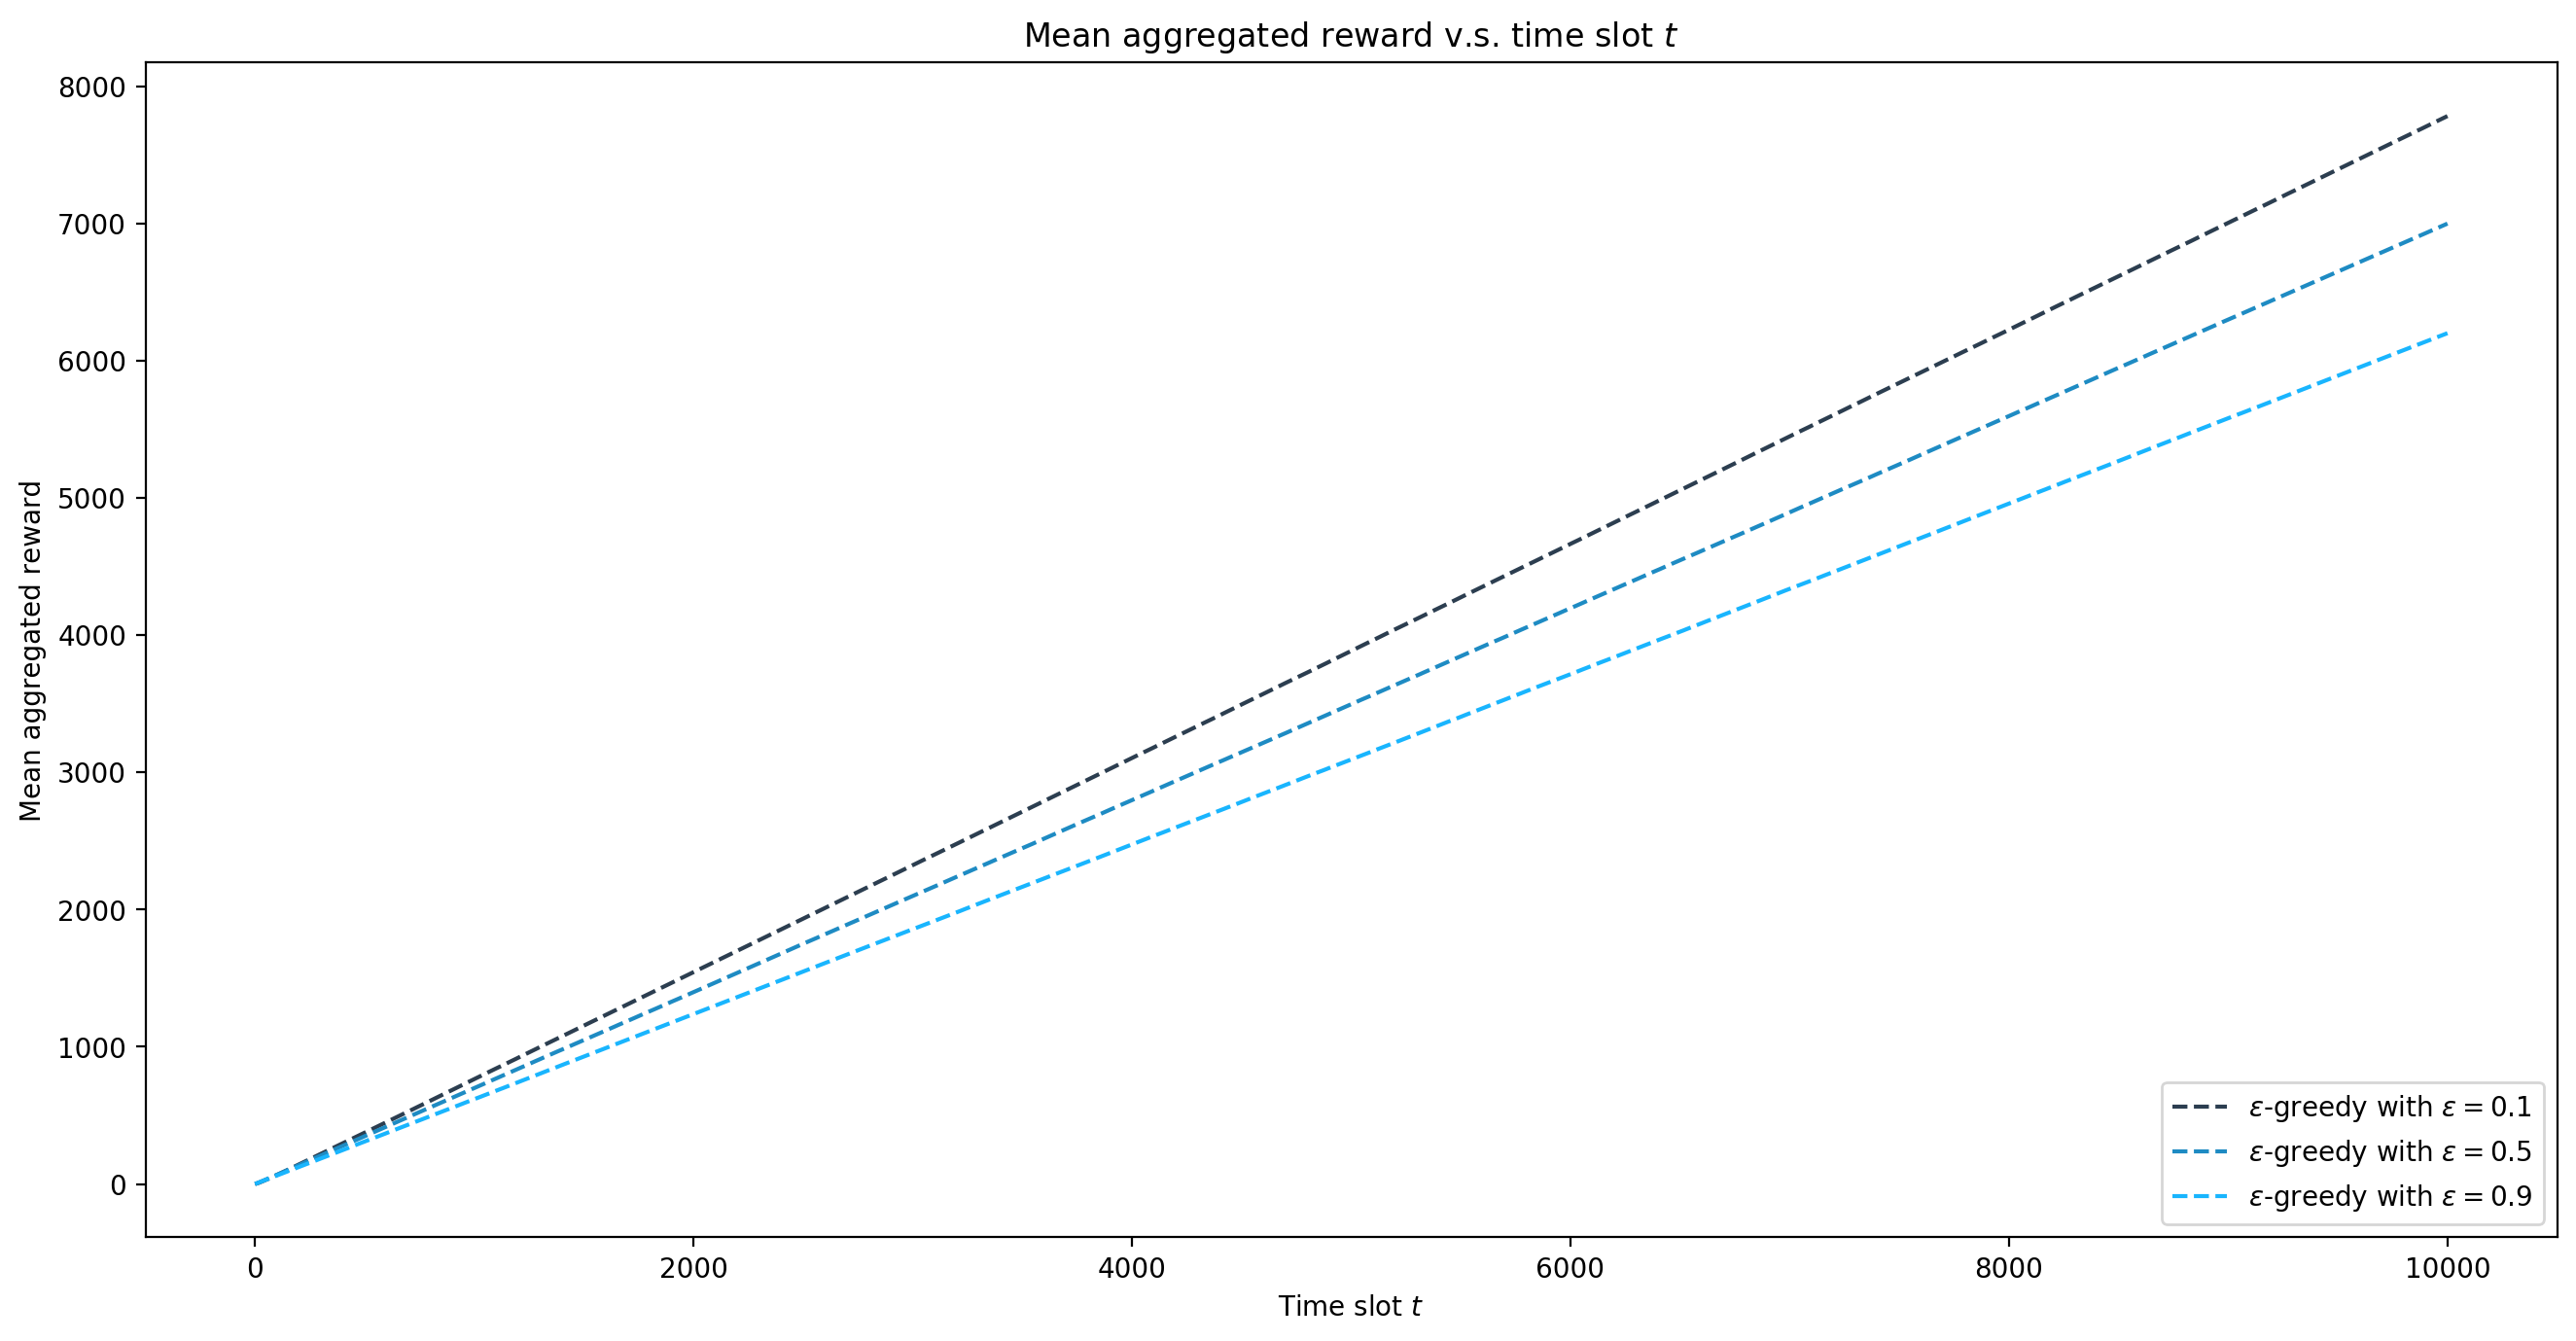

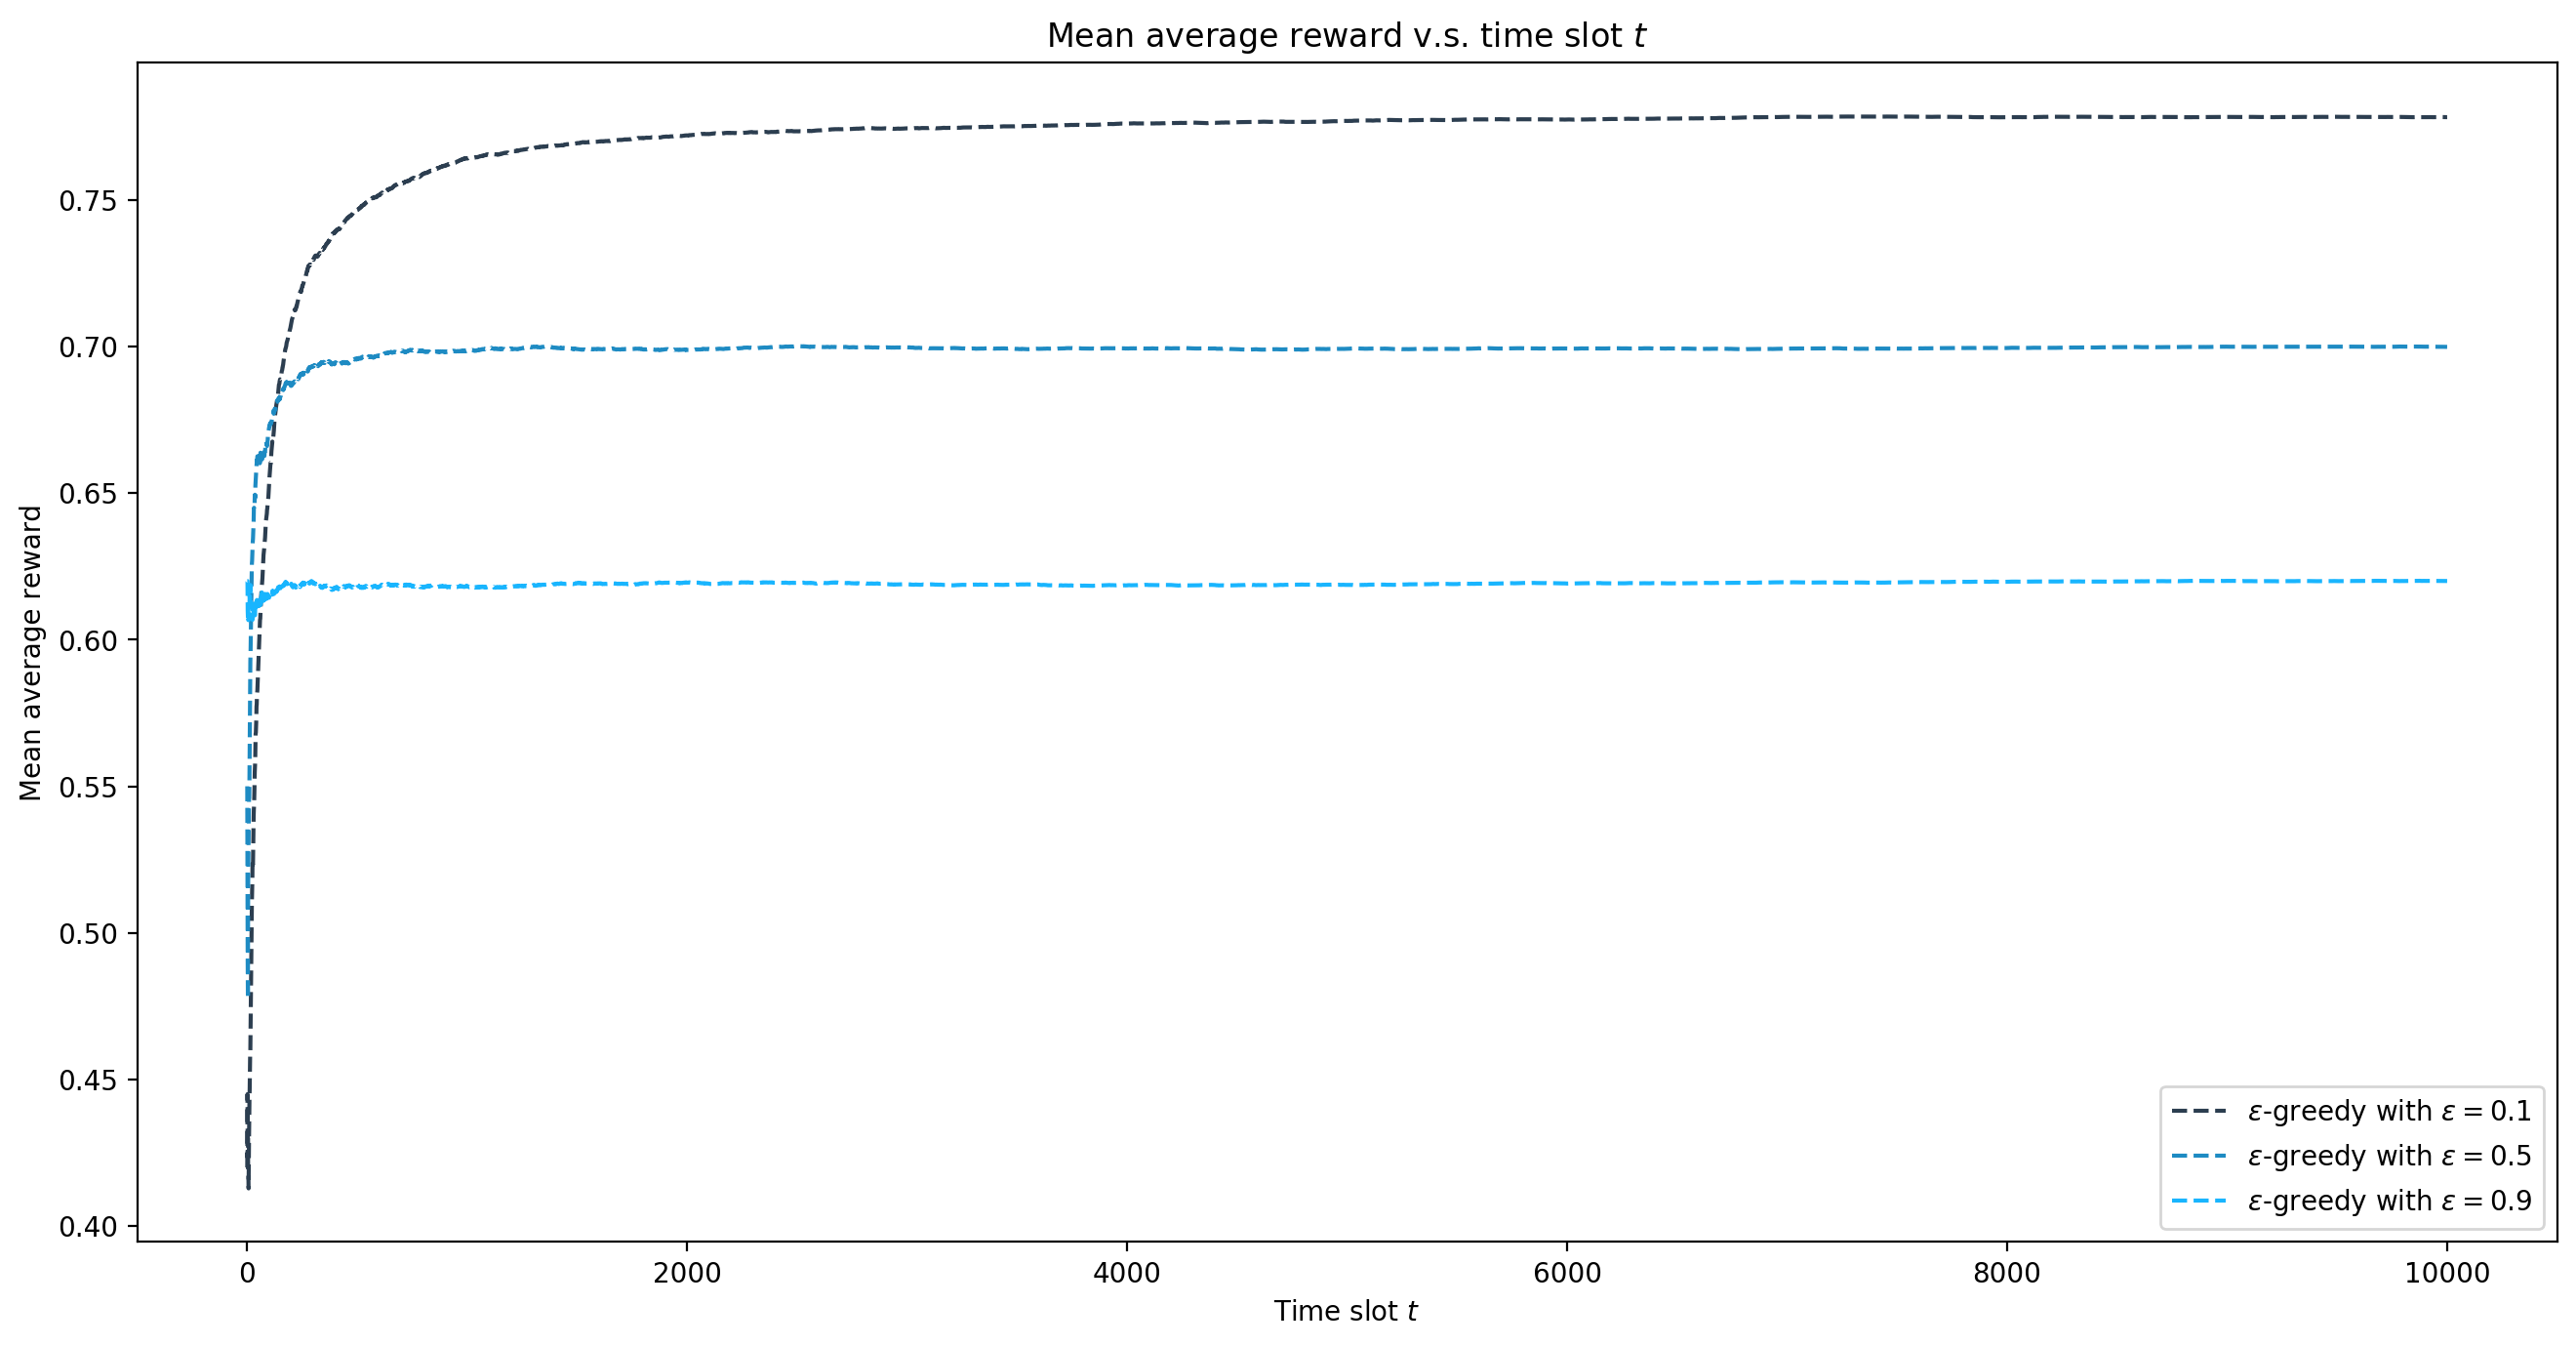

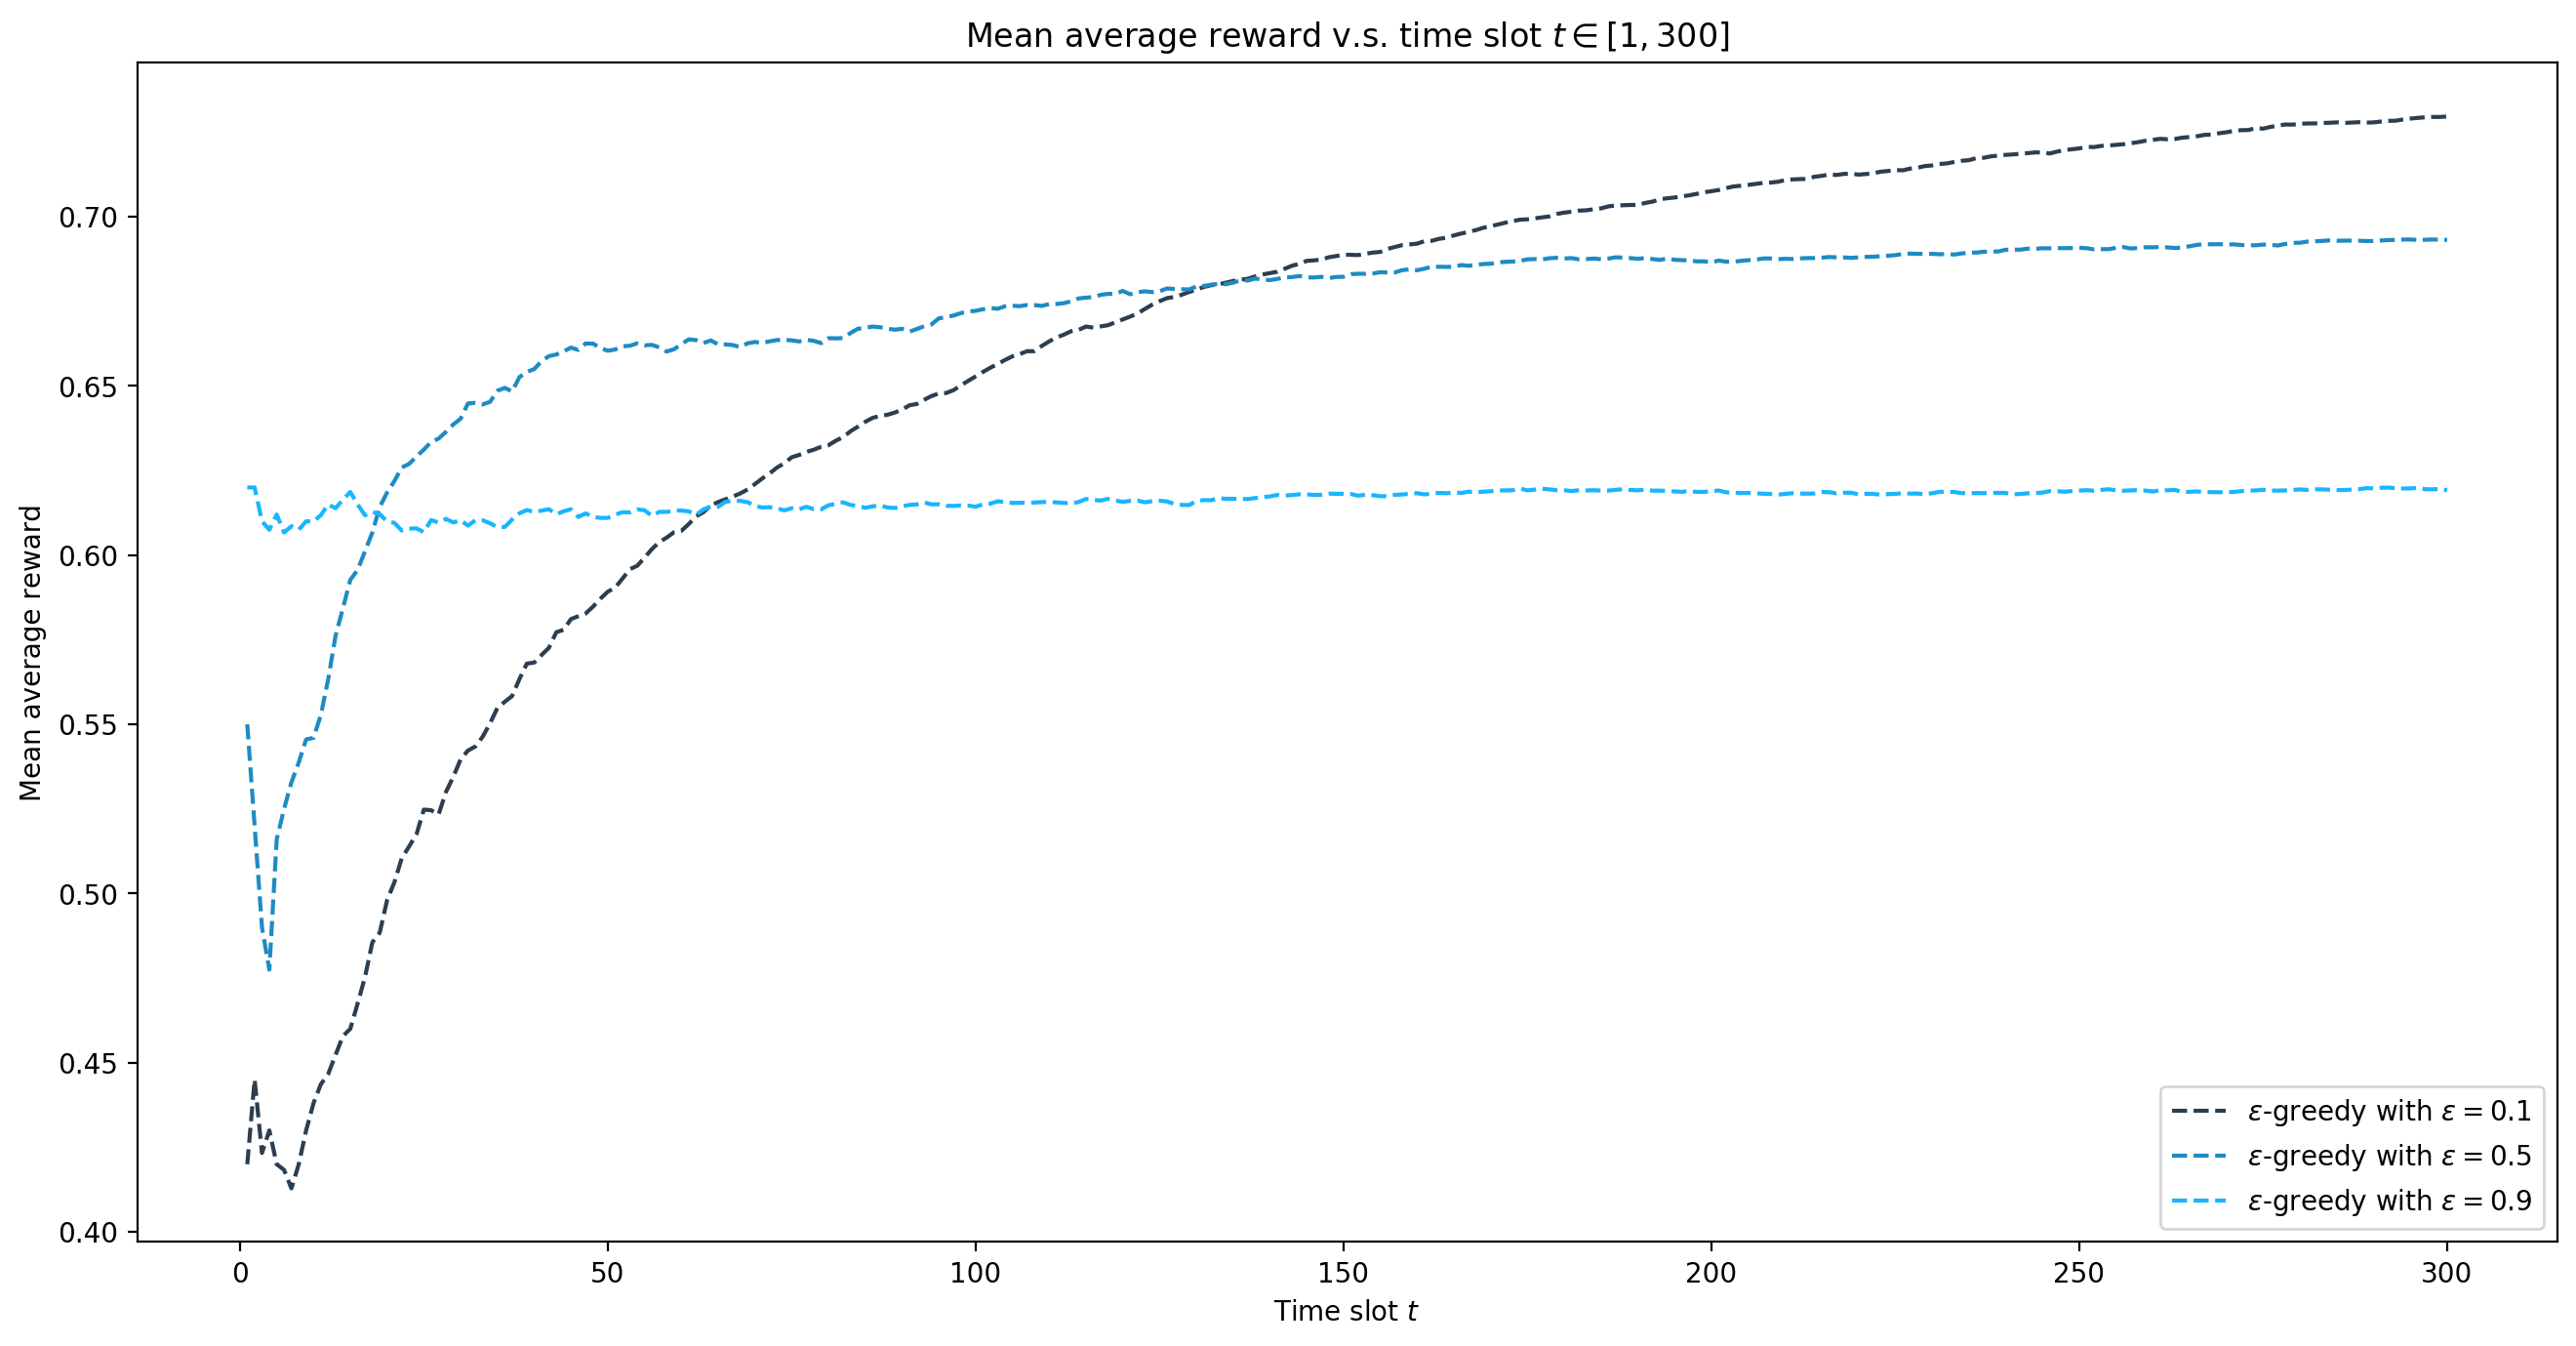

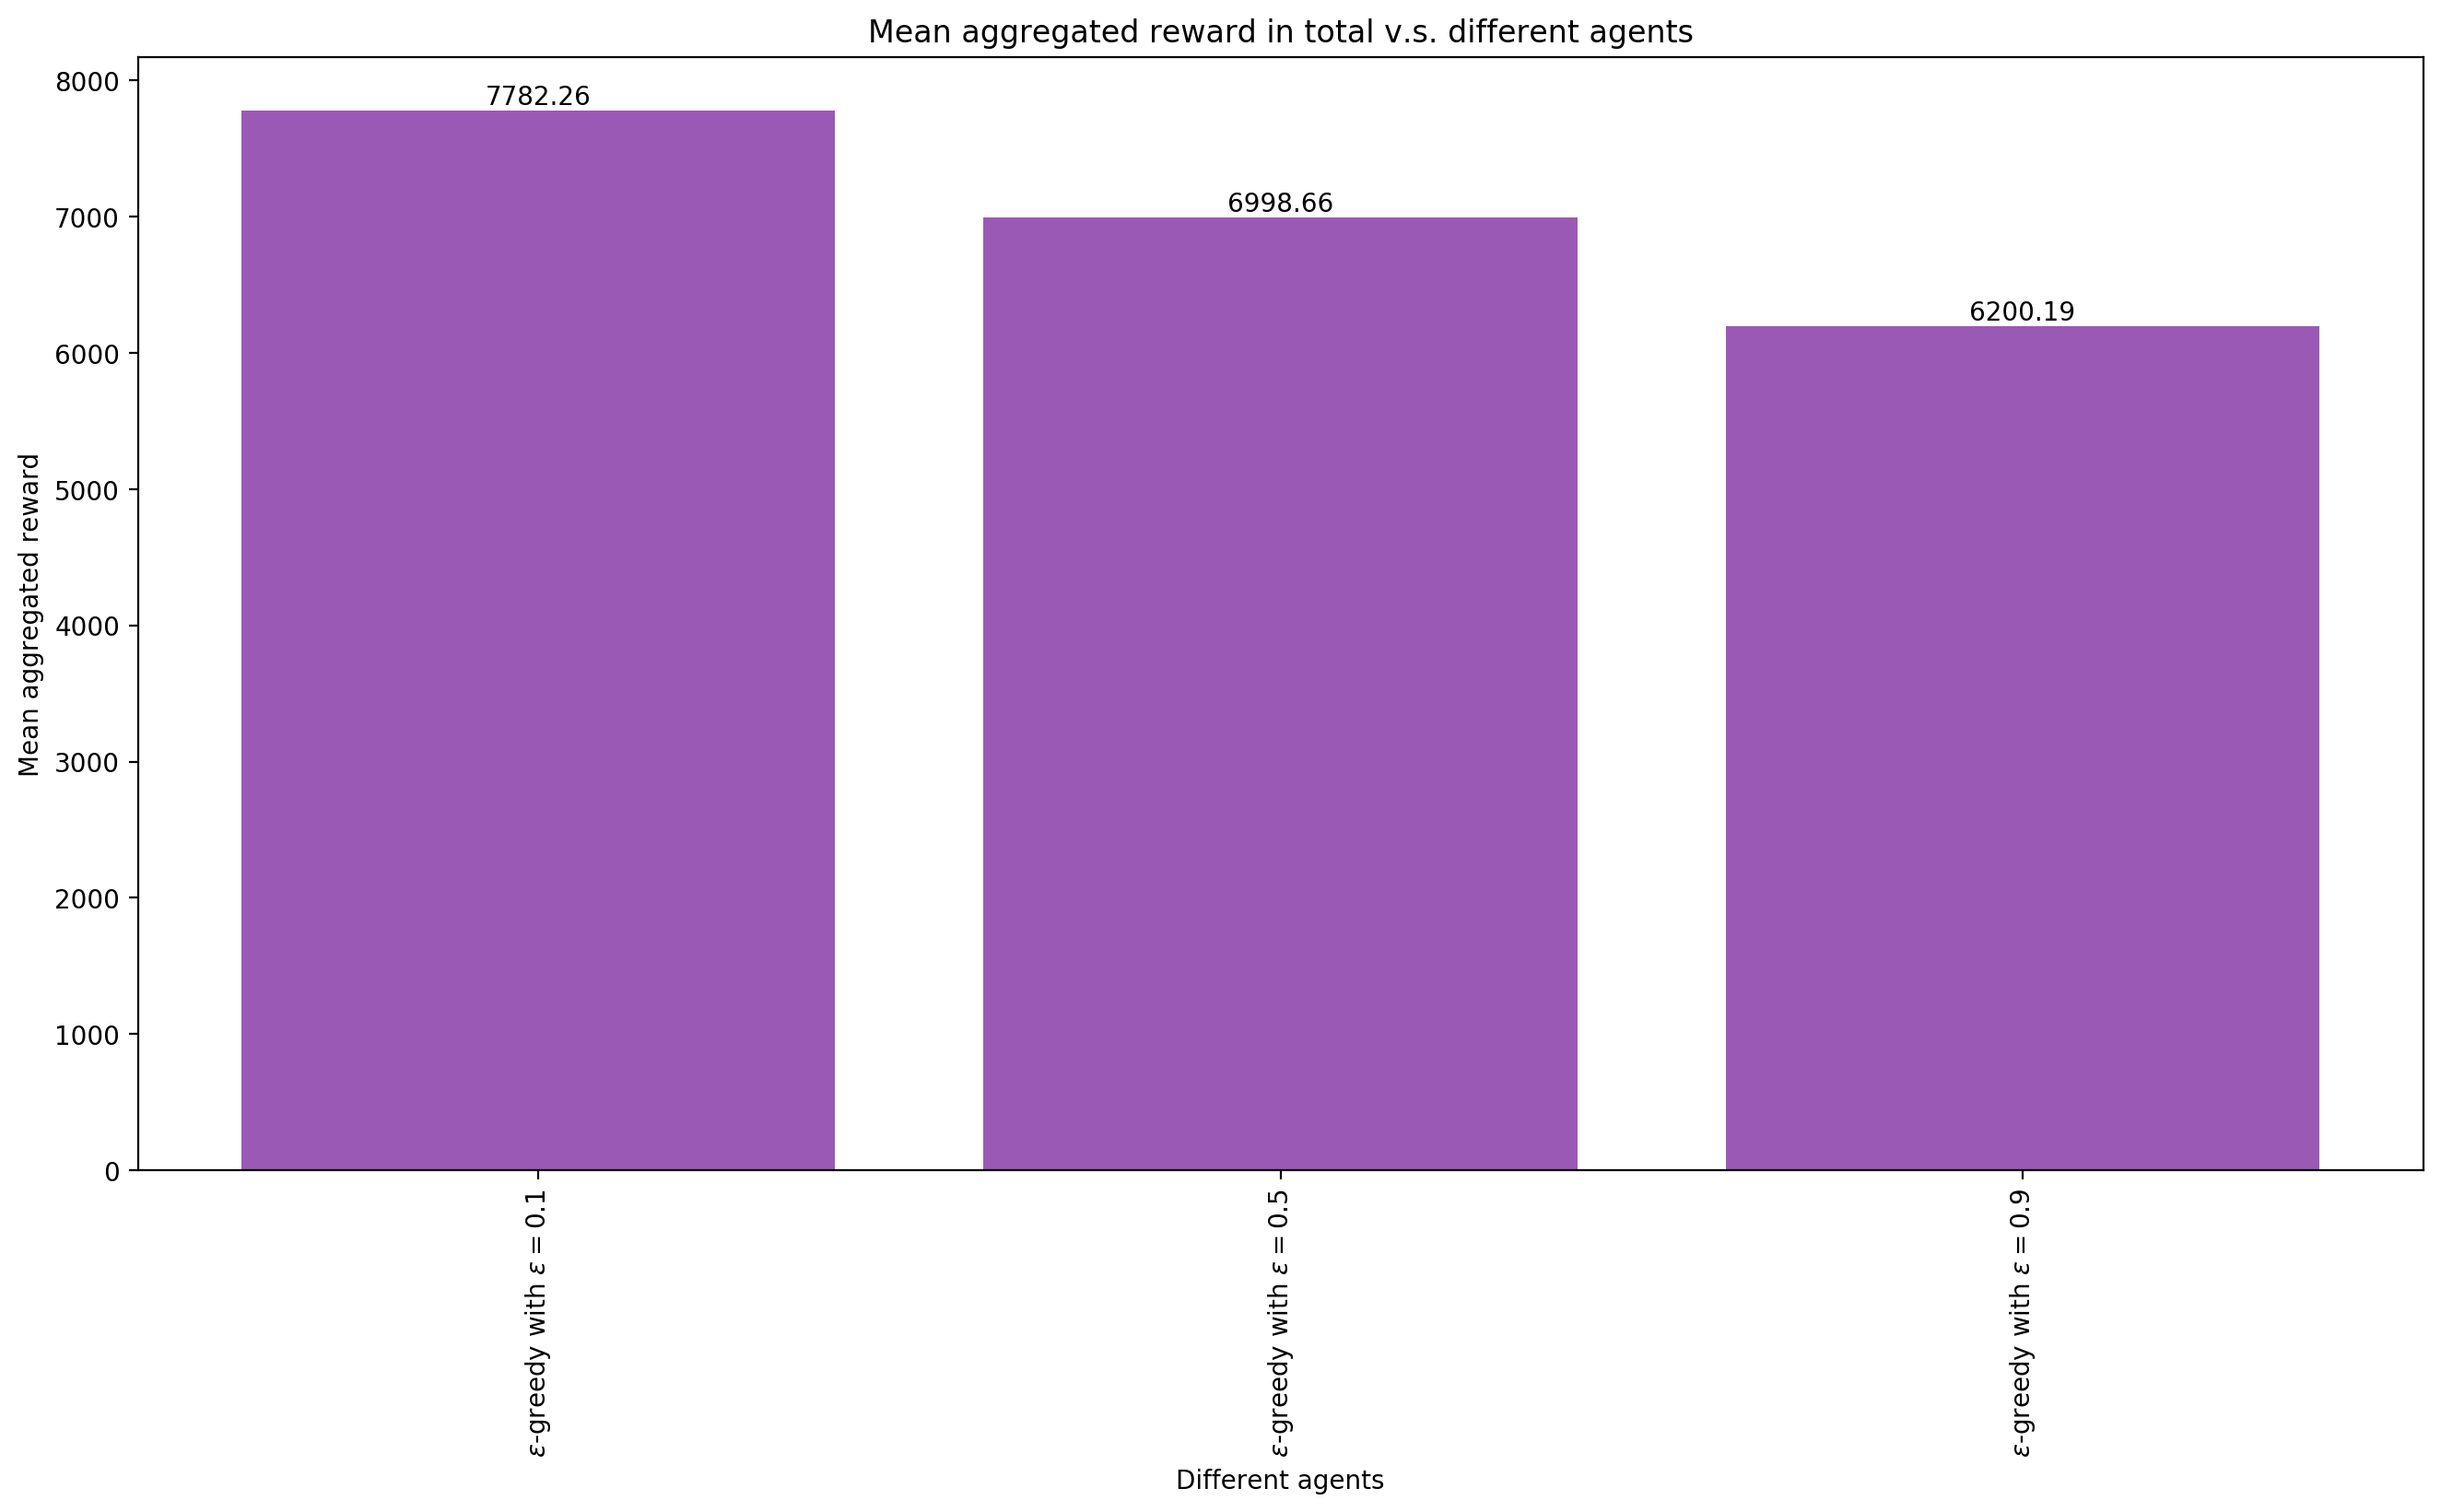

In [5]:
from simulator import Simulator
from agent import EpsilonGreedyAgent


agent1 = EpsilonGreedyAgent(epsilon=0.1)
agent2 = EpsilonGreedyAgent(epsilon=0.5)
agent3 = EpsilonGreedyAgent(epsilon=0.9)

sim = Simulator(number_of_time_slot=N, number_of_repetition=100)
sim.run_agent(agent1)
sim.run_agent(agent2)
sim.run_agent(agent3)

sim.plot(indices=[0, 1, 2])

## Impact of $\epsilon$

The value of $\epsilon$ decides the likelihood to _exploit_ in the decision between _exploration_ and _exploitation_. As we can see, the greater the value of $\epsilon$ is, the more likely it will to _explore_, which means that it is less greedier.

With greater value of $\epsilon$:
- More likely it will to _explore_
- Less greedy
- Smaller aggregated reward in the long term
- Shorter convergence time (converge more quickly)
- Better estimation (given enough time)

# UCB simulations

Agent 'UCB with c = 1' completed.
    Mean aggregated reward in total: 7905.55
Agent 'UCB with c = 5' completed.
    Mean aggregated reward in total: 7148.72
Agent 'UCB with c = 10' completed.
    Mean aggregated reward in total: 6664.73


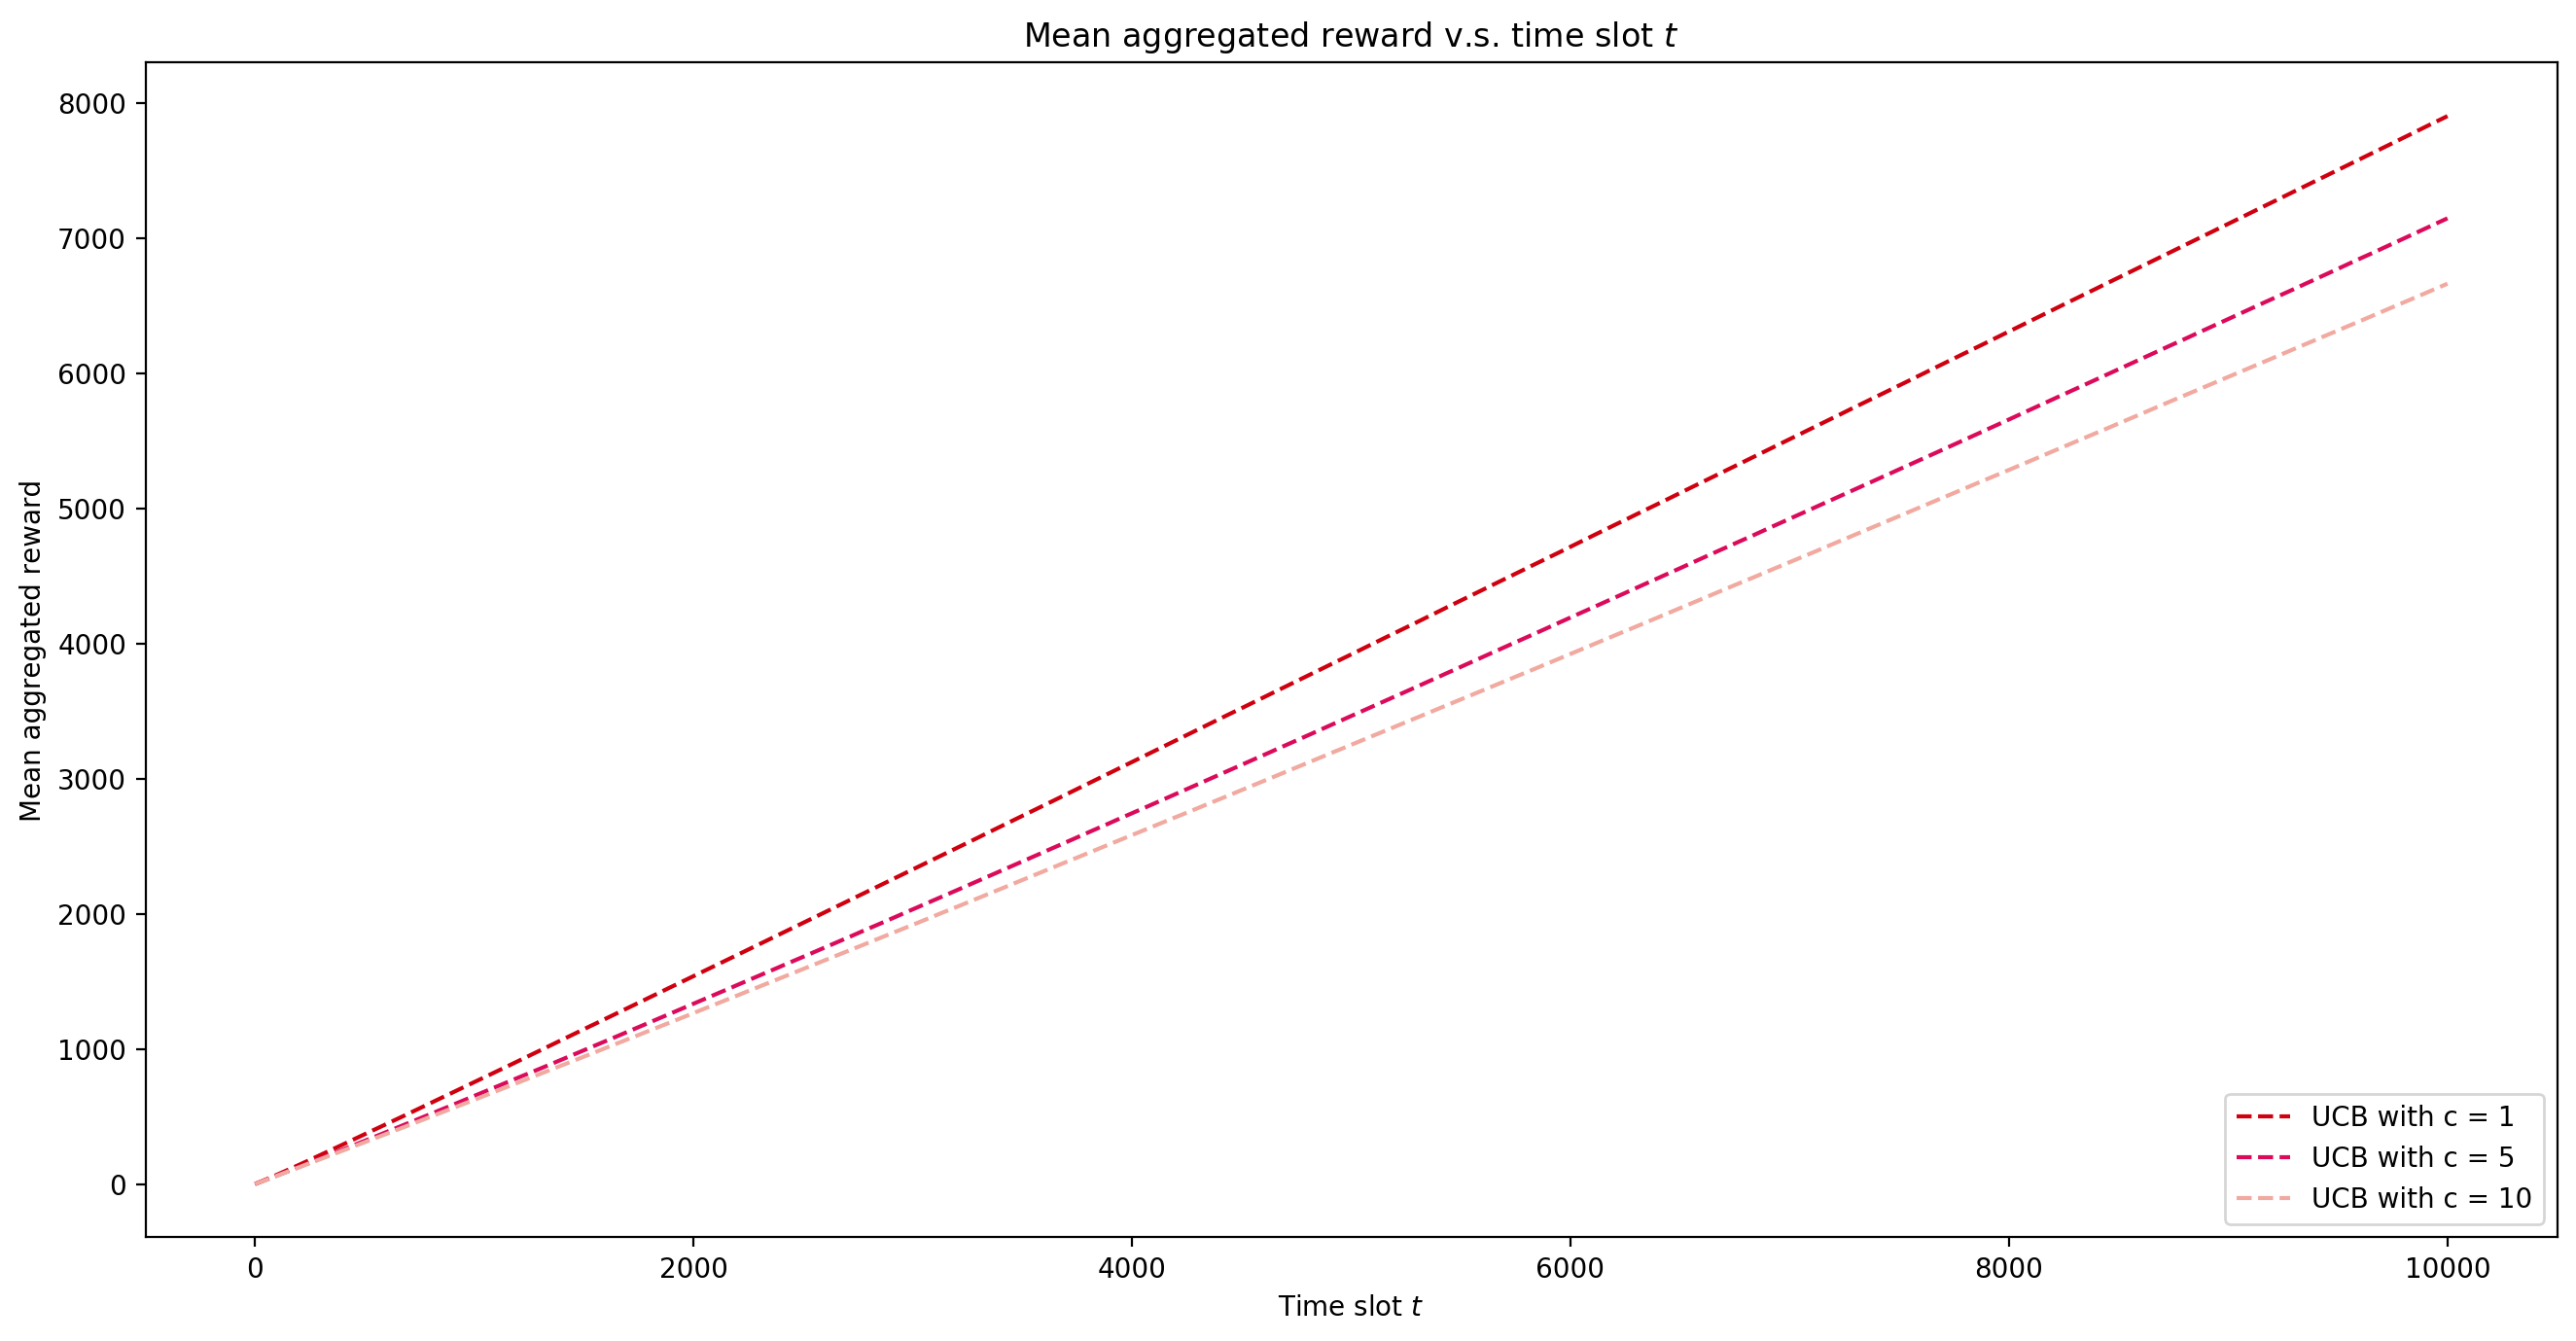

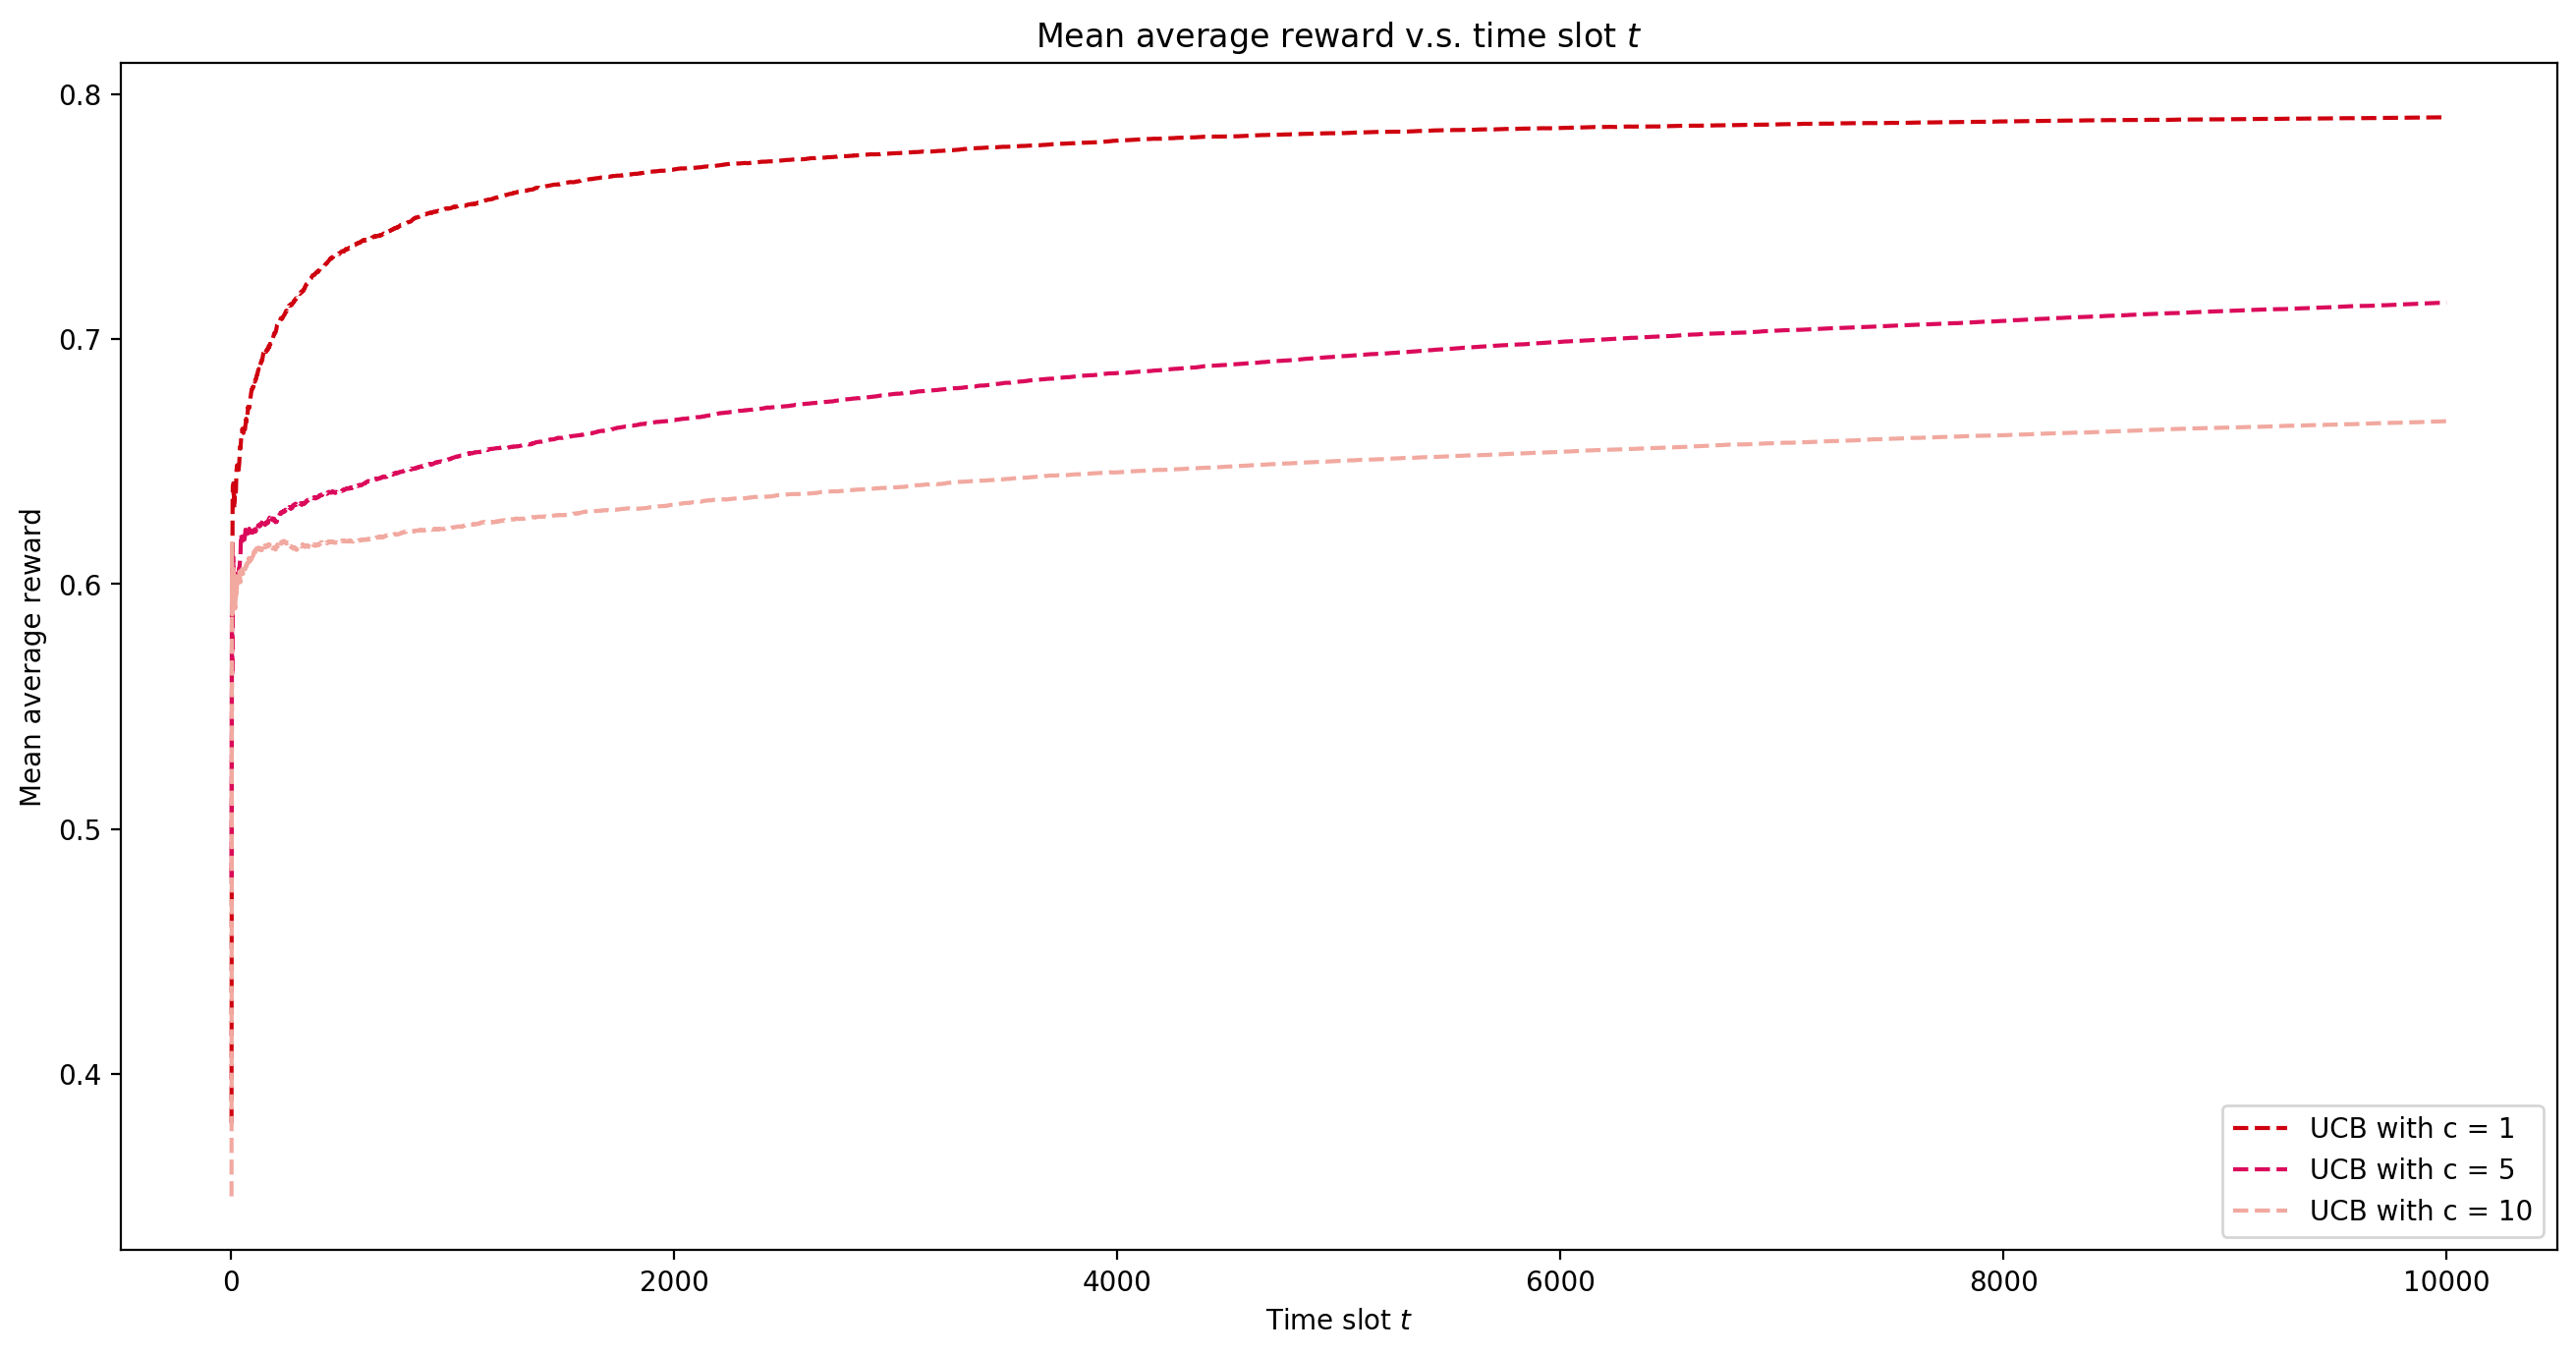

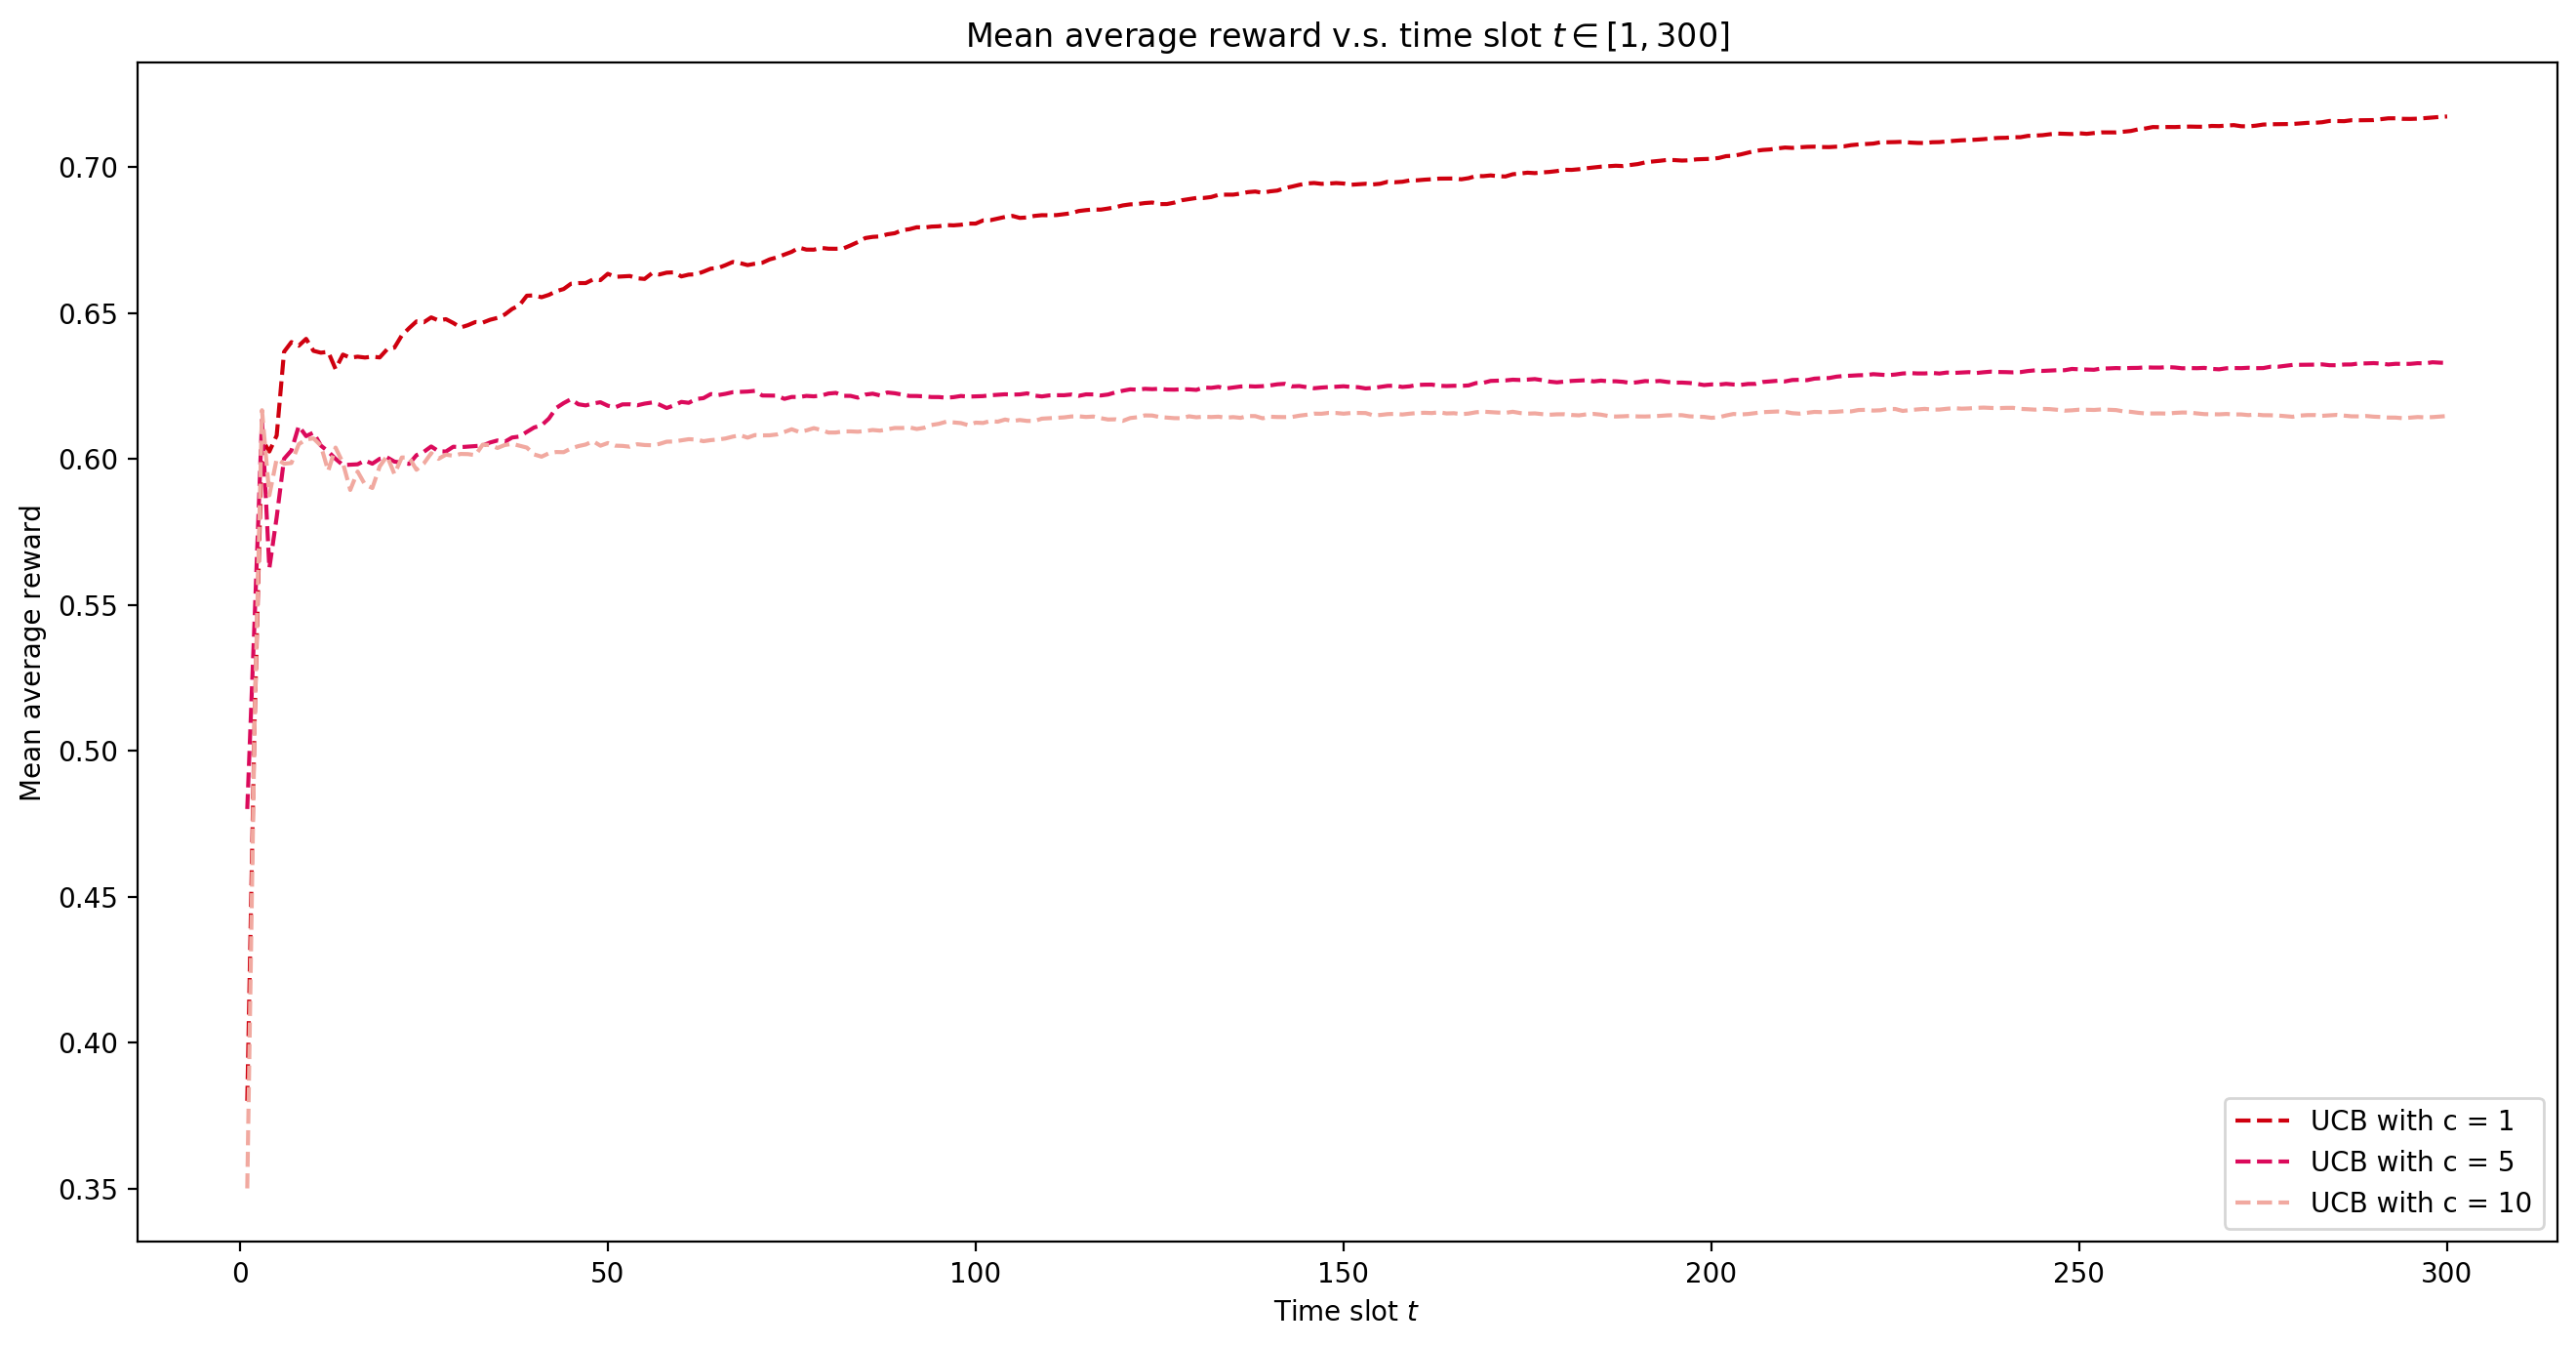

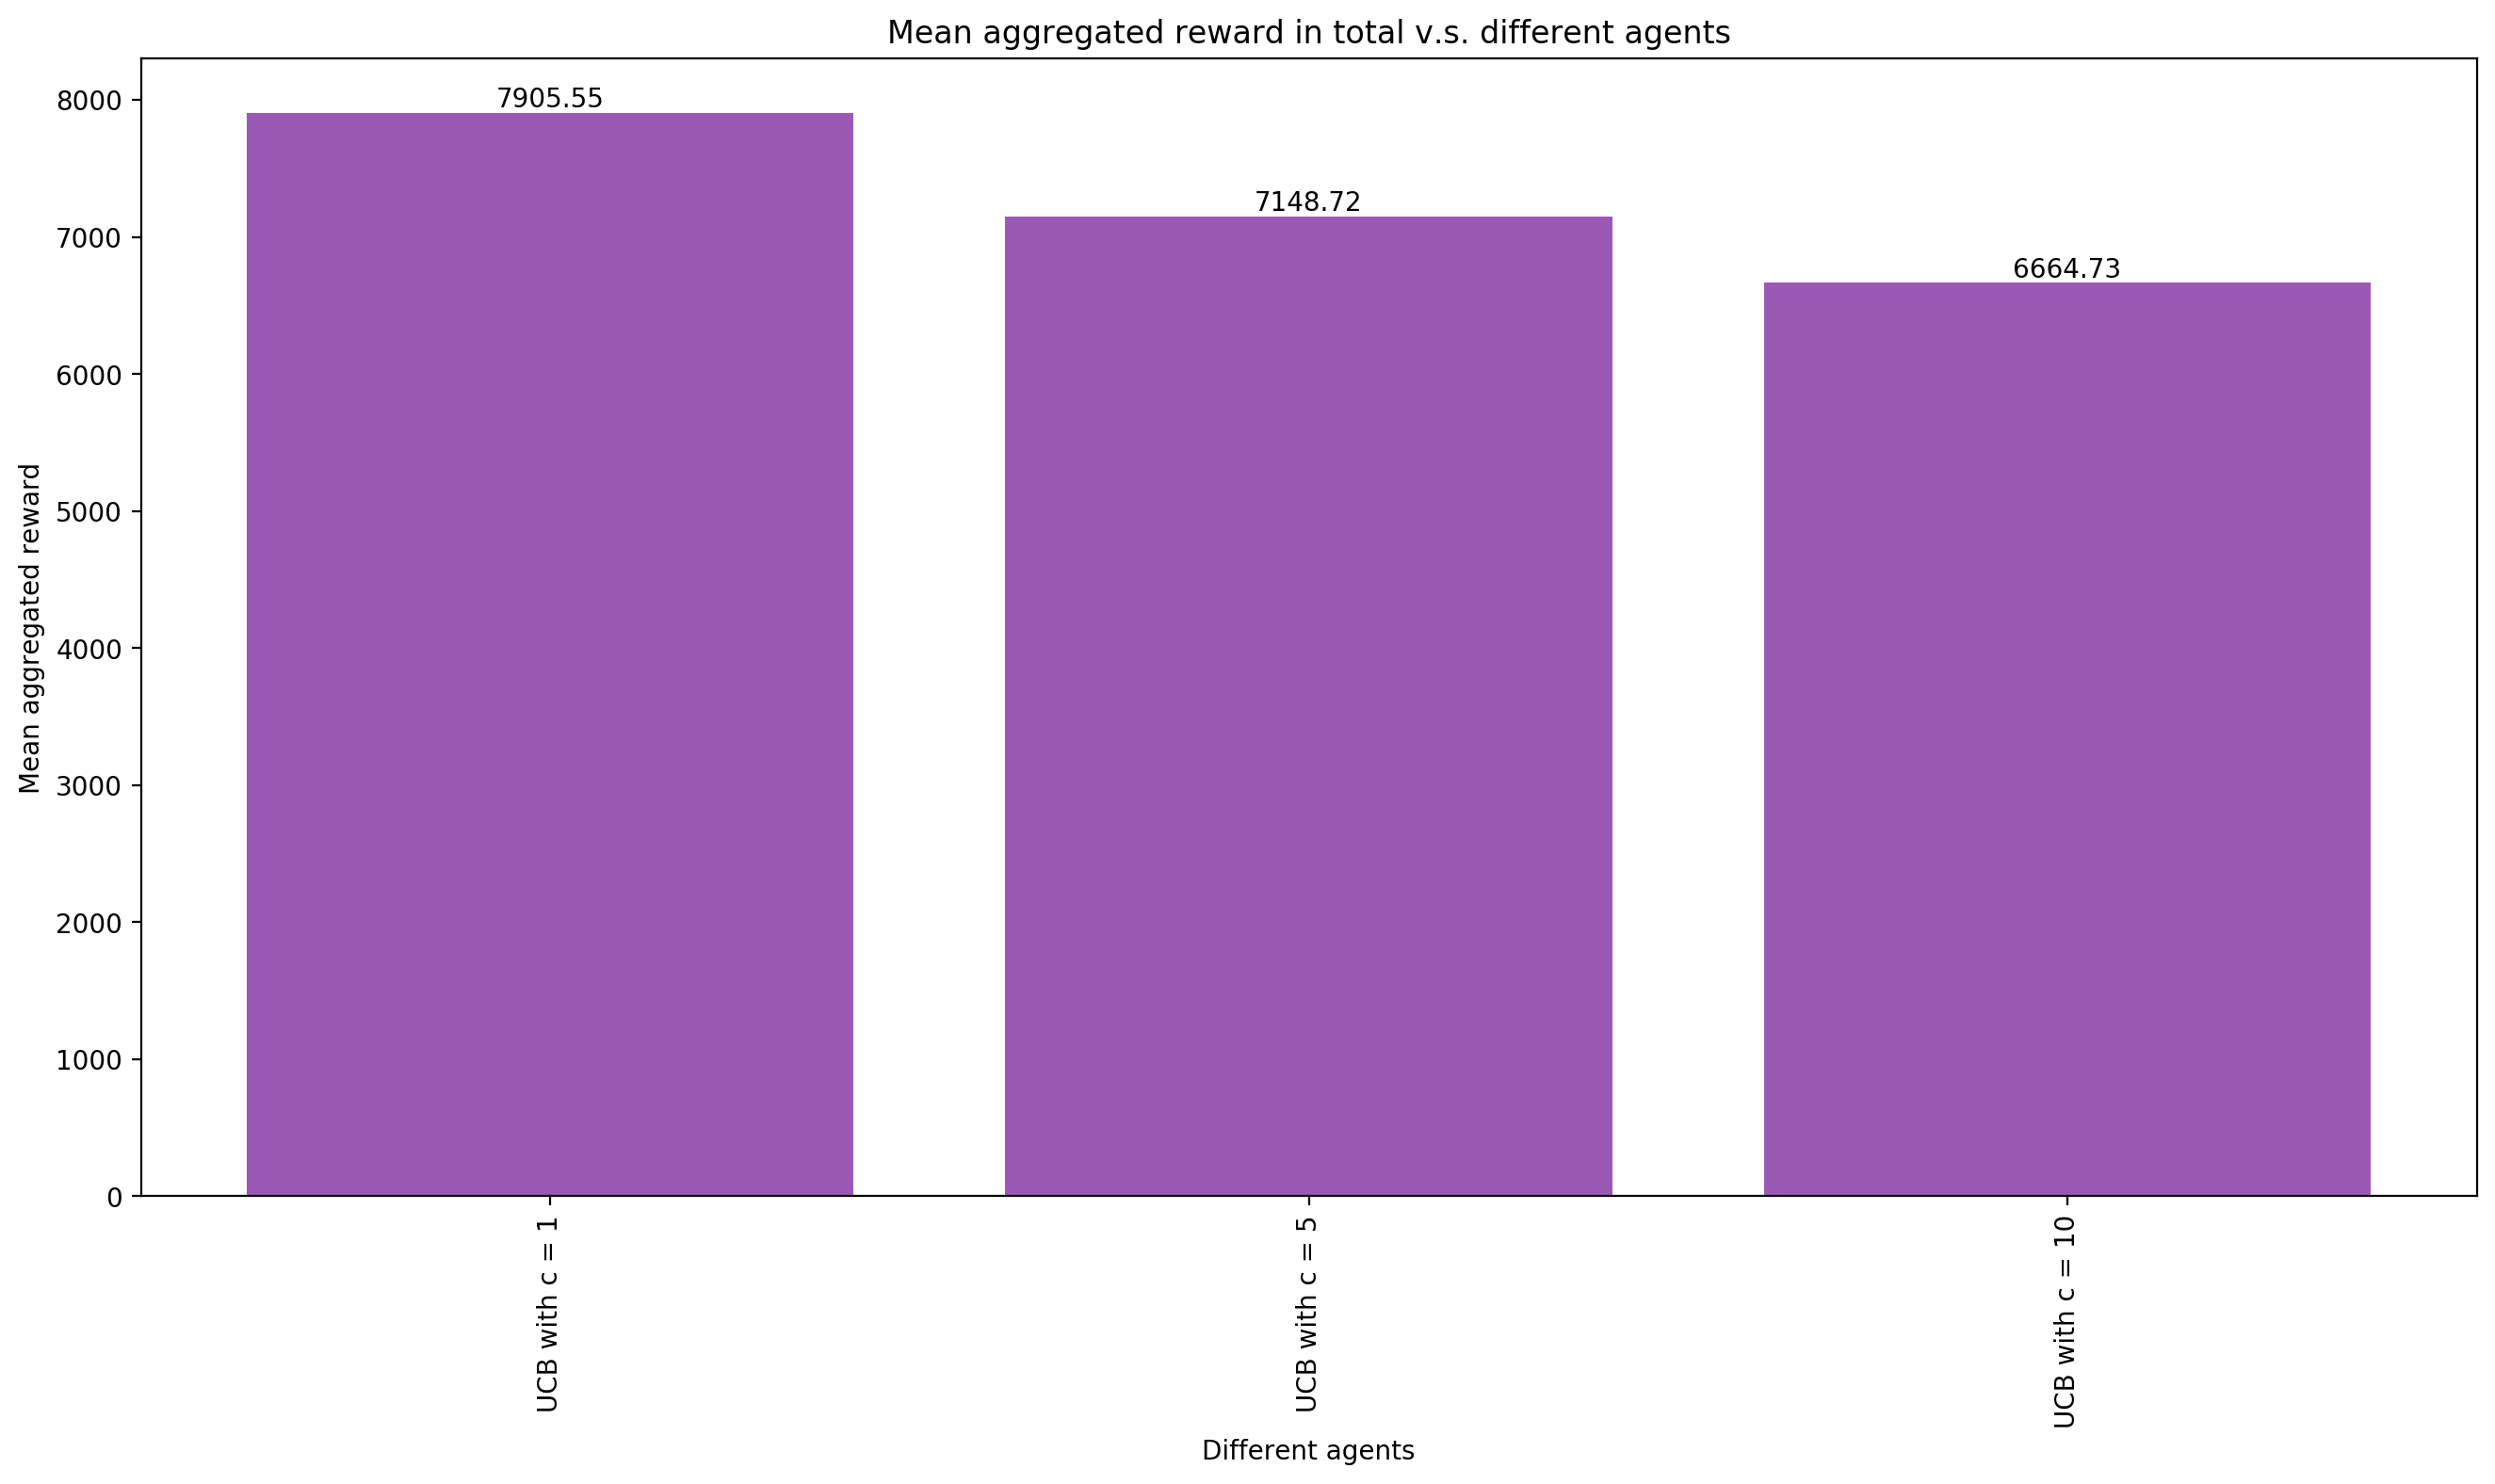

In [6]:
from agent import UcbAgent


for agent in [UcbAgent(c=c) for c in [1, 5, 10]]:
    sim.run_agent(agent)

sim.plot(indices=[3, 4, 5])

## Impact of $c$

With greater value of $c$:
- Smaller aggregated reward in the long term
- Shorter convergence time (converge more quickly)
- Better estimation (given enough time)

# Thompson sampling simulations

Agent 'TS with $\{(\alpha_1, \beta_1) = (1, 1), (\alpha_2, \beta_2) = (1, 1), (\alpha_3, \beta_3) = (1, 1)\}$' completed.
    Mean aggregated reward in total: 7979.37
Agent 'TS with $\{(\alpha_1, \beta_1) = (2, 3), (\alpha_2, \beta_2) = (4, 4), (\alpha_3, \beta_3) = (6, 2)\}$' completed.
    Mean aggregated reward in total: 7991.4


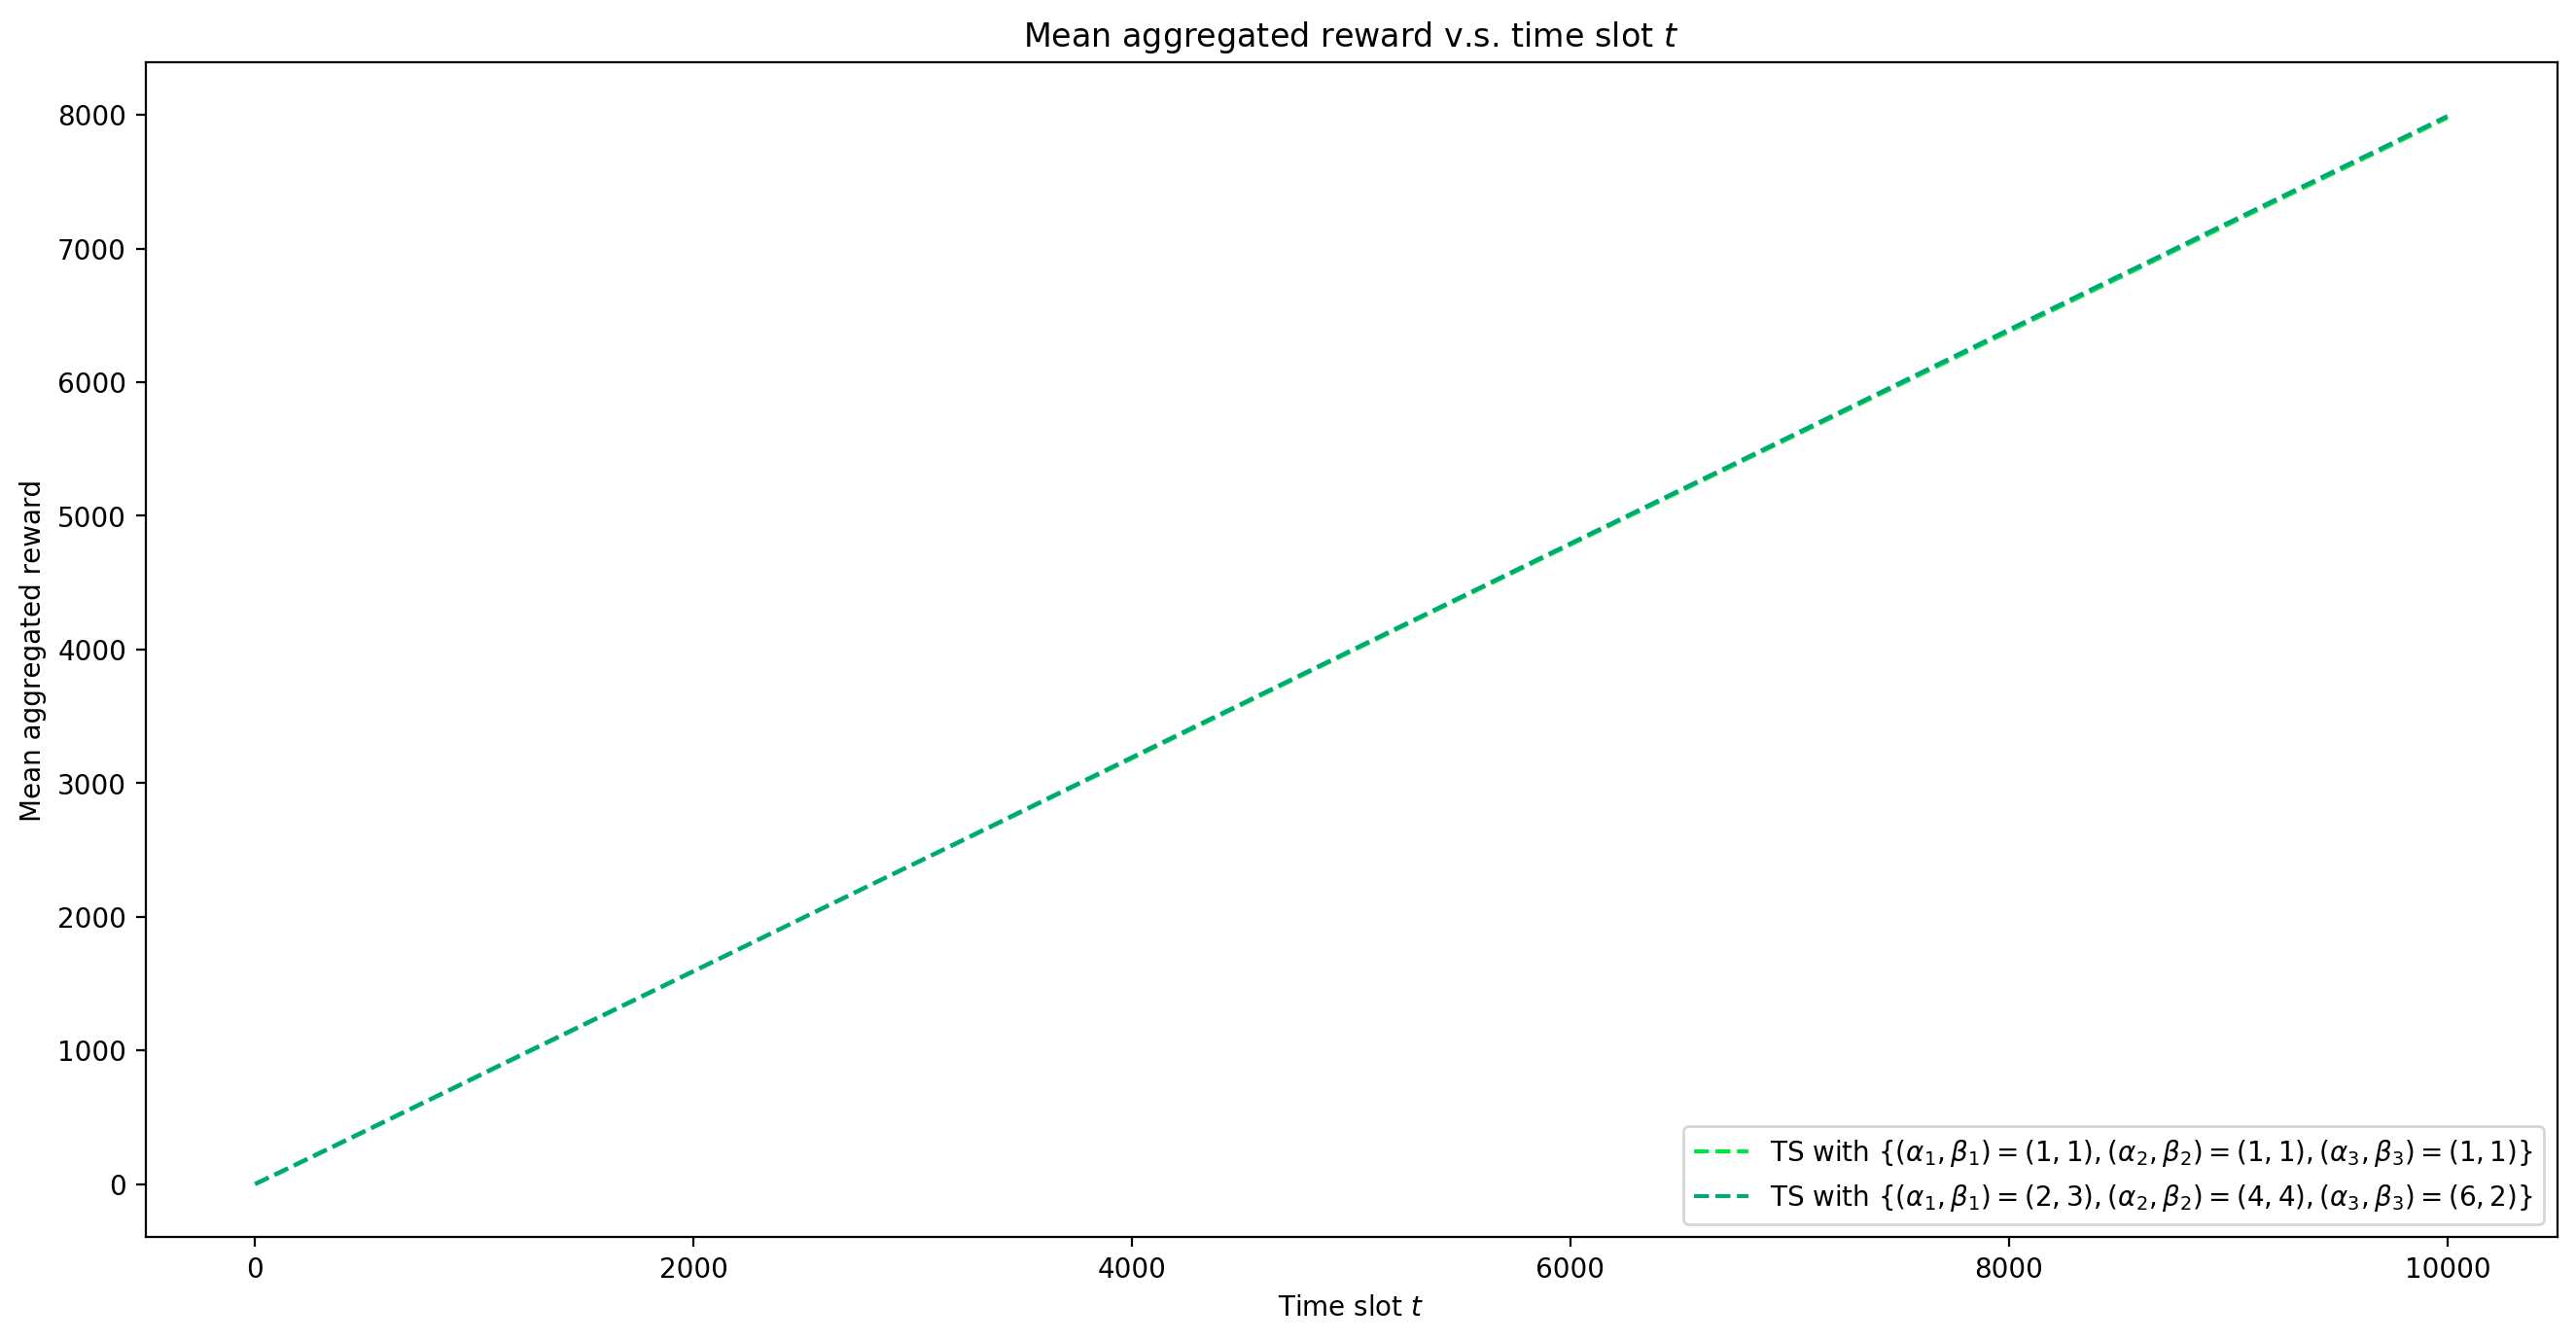

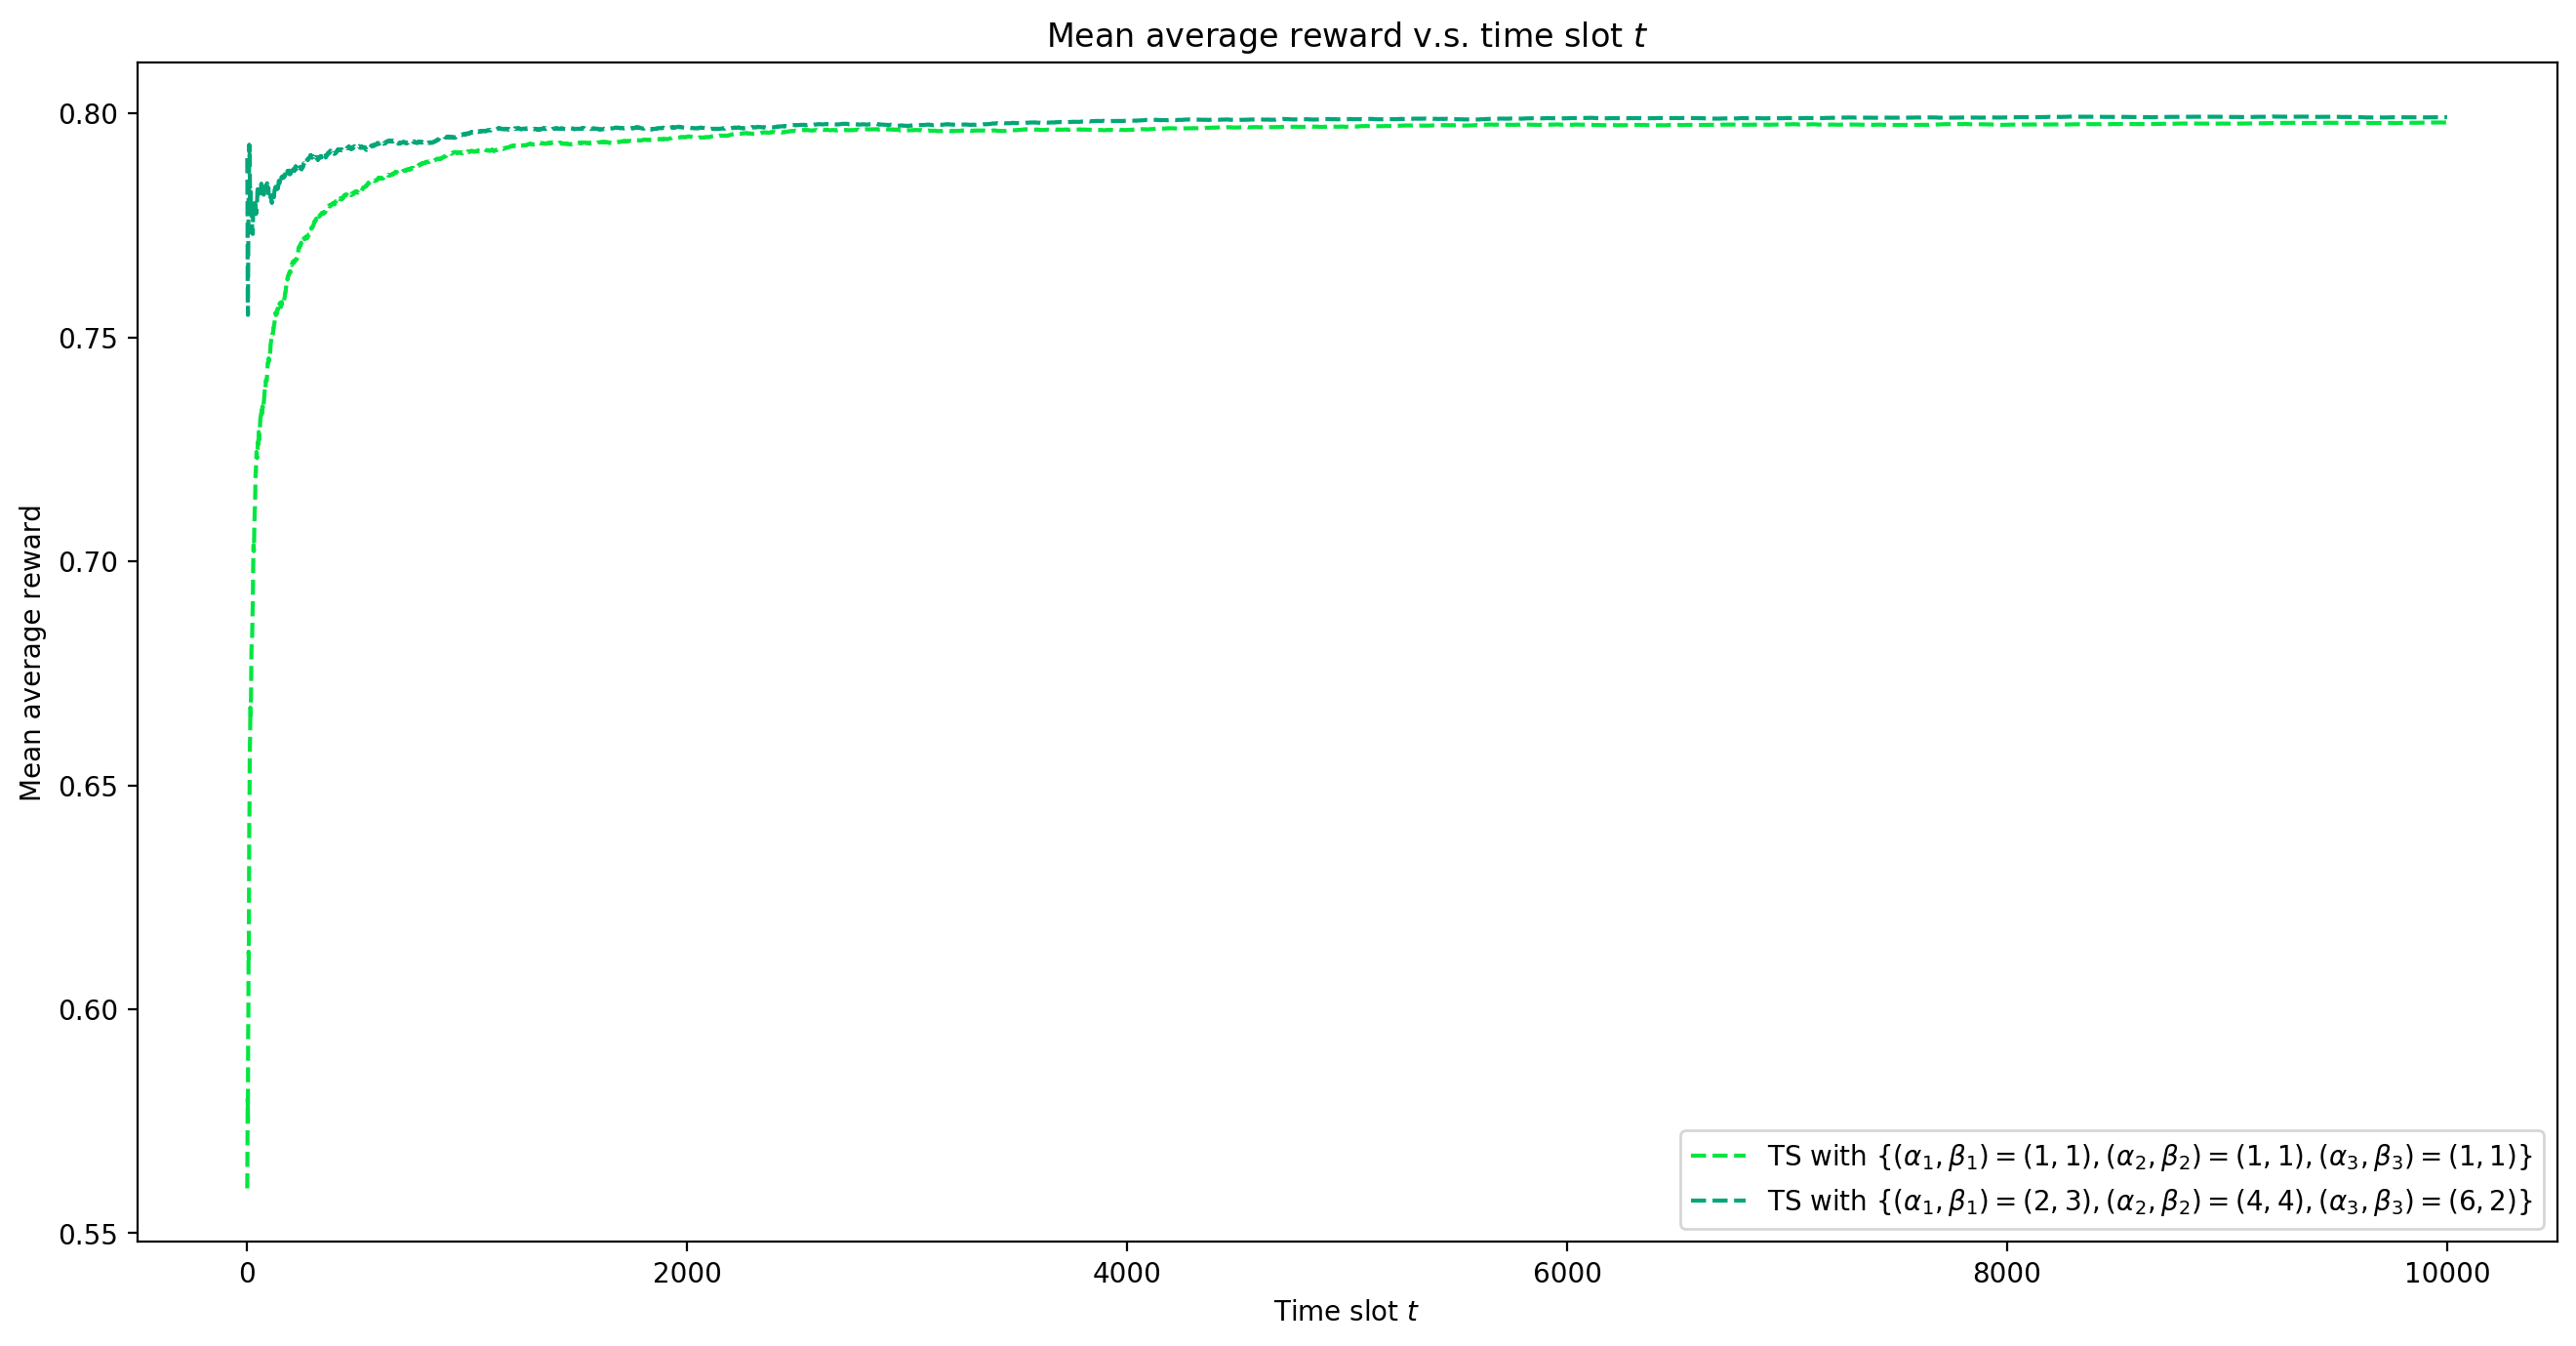

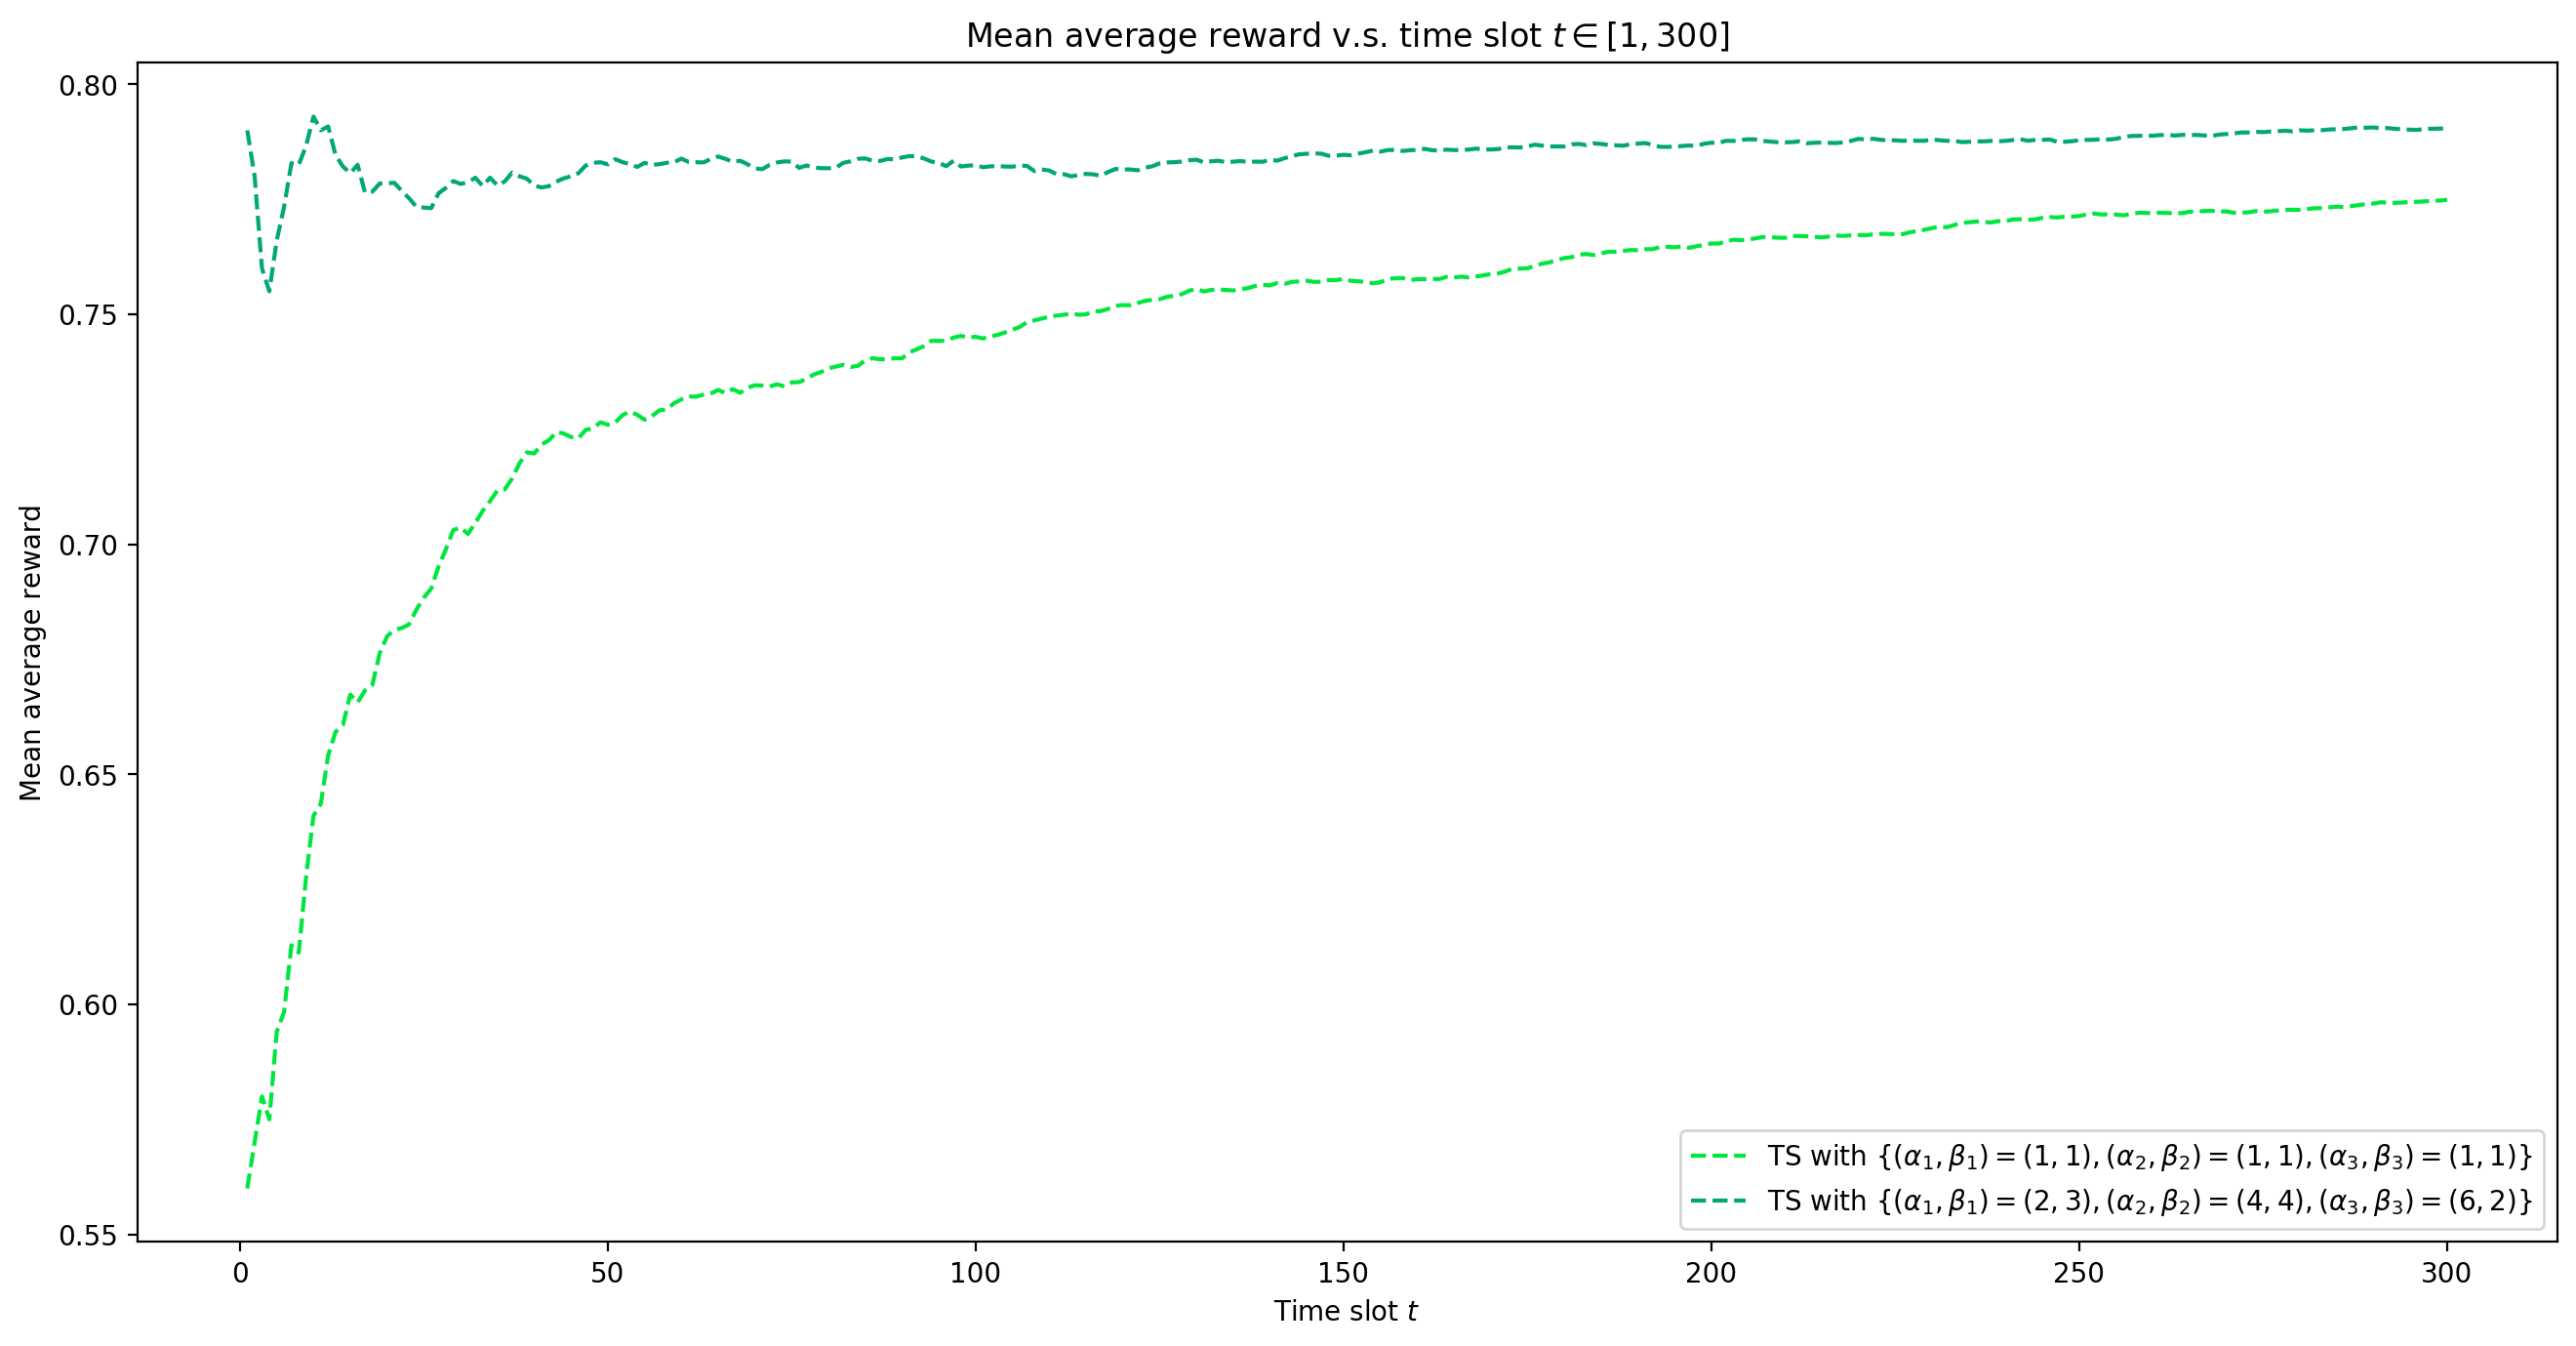

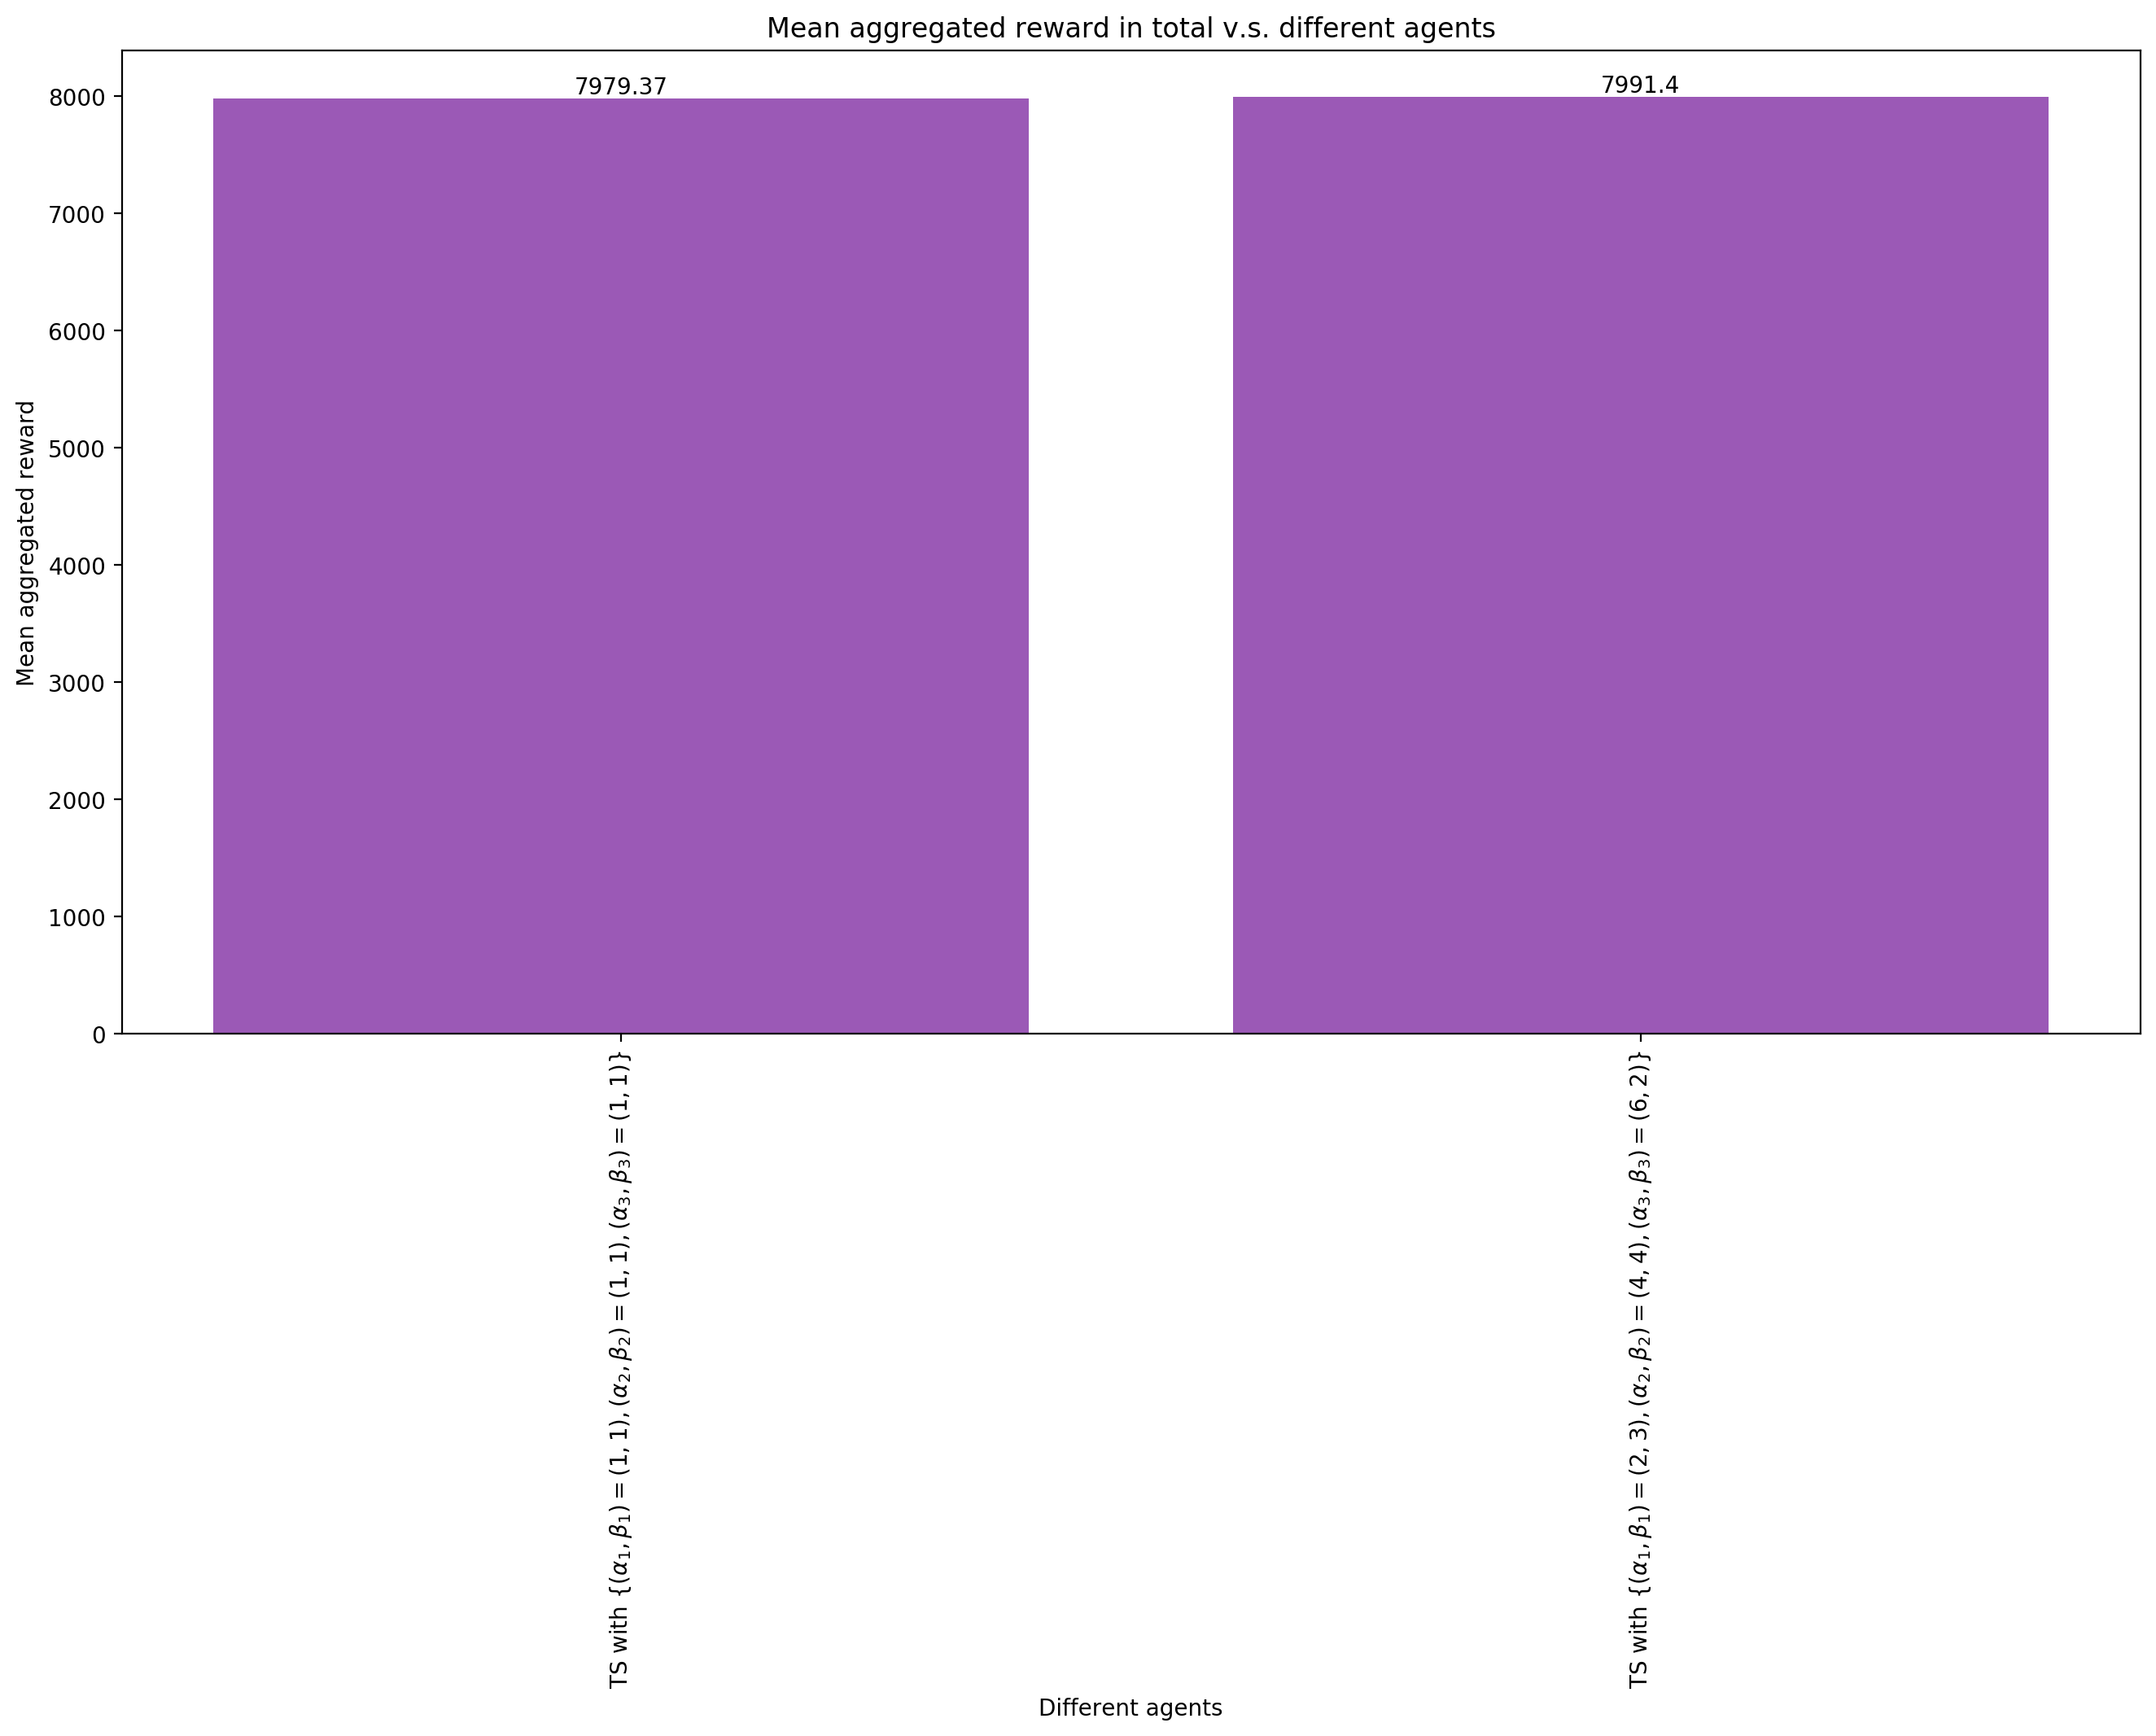

In [7]:
from agent import TsAgent

tsAgent1 = TsAgent(alpha_list=[1, 1, 1], beta_list=[1, 1, 1])
tsAgent2 = TsAgent(alpha_list=[2, 3, 4], beta_list=[4, 6, 2])

sim.run_agent(tsAgent1)
sim.run_agent(tsAgent2)

sim.plot(indices=[6, 7])

## Impace of $(\alpha, \beta)$

Here for the aggregated reward in total, we can see that the two settings of the TS algorithm have quite close performances.

For the impace of $(\alpha, \beta)$ on the estimation of $\theta$, we will discuss later with plots.

# Persist the data via store the Simulator object

All the data of the experiment results have been persisted via the `pickle` utility provided by Python. The initial `Simulator` object can be recovered from the data file easily.

## A glance at the `Simulator` class

### Fields

- `number_of_time_slot`
- `number_of_repetition`
- `reward_3d_ndarray = np.zeros((0, self.number_of_repetition, self.number_of_time_slot), dtype=float)`
- `mean_reward_2d_ndarray = np.zeros((0, self.number_of_time_slot), dtype=float)`
- `aggregated_reward_3d_ndarray = np.zeros((0, self.number_of_repetition, self.number_of_time_slot), dtype=float)`
- `mean_aggregated_reward_2d_ndarray = np.zeros((0, self.number_of_time_slot), dtype=float)`
- `average_reward_3d_ndarray = np.zeros((0, self.number_of_repetition, self.number_of_time_slot), dtype=float)`
- `mean_average_reward_2d_ndarray = np.zeros((0, self.number_of_time_slot), dtype=float)`
- `mean_aggregated_reward_array = np.array([])`
- `payload_list = []`
- `agent_name_array = np.array([])`

### Methods

- `run_agent(agent)`

- `plot(begin=0, end=-1)`

- `plot_mean_aggregated_reward(begin=0, end=-1)`

- `plot_mean_average_reward(begin=0, end=-1)`

- `plot_first_300_range_mean_average_reward(begin=0, end=-1)`

- `plot_mean_aggregated_reward_in_total(oracle_value=None, begin=0, end=-1)`

- `dump(filename=None)`


In [8]:
sim.dump()

The Simulator object has been pickled to file 'pickled_simulator_with_id_139947365595536.p'.


# Store the reward and aggregated reward

The initial **reward** data are persisted in the field `Simulator.reward_3d_ndarray`.

The meanings of each dimension in order of the 3-dimentional array are:
- Different agents
- Different repetitions
- Time slot `t`

The **mean reward** data are persisted in the field `Simulator.mean_reward_2d_ndarray`.

The **aggregated reward** data are persisted in the field `Simulator.aggregated_reward_3d_ndarray`.

The **mean (averaged over 100 repetitions) aggregated reward** data are persisted in the field `Simulator.mean_aggregated_reward_2d_ndarray`.

The meanings of each dimension in order of the 2-dimensional array are:
- Different agents
- Time slot `t`

# Plot the mean aggregated reward v.s. time slot `t`

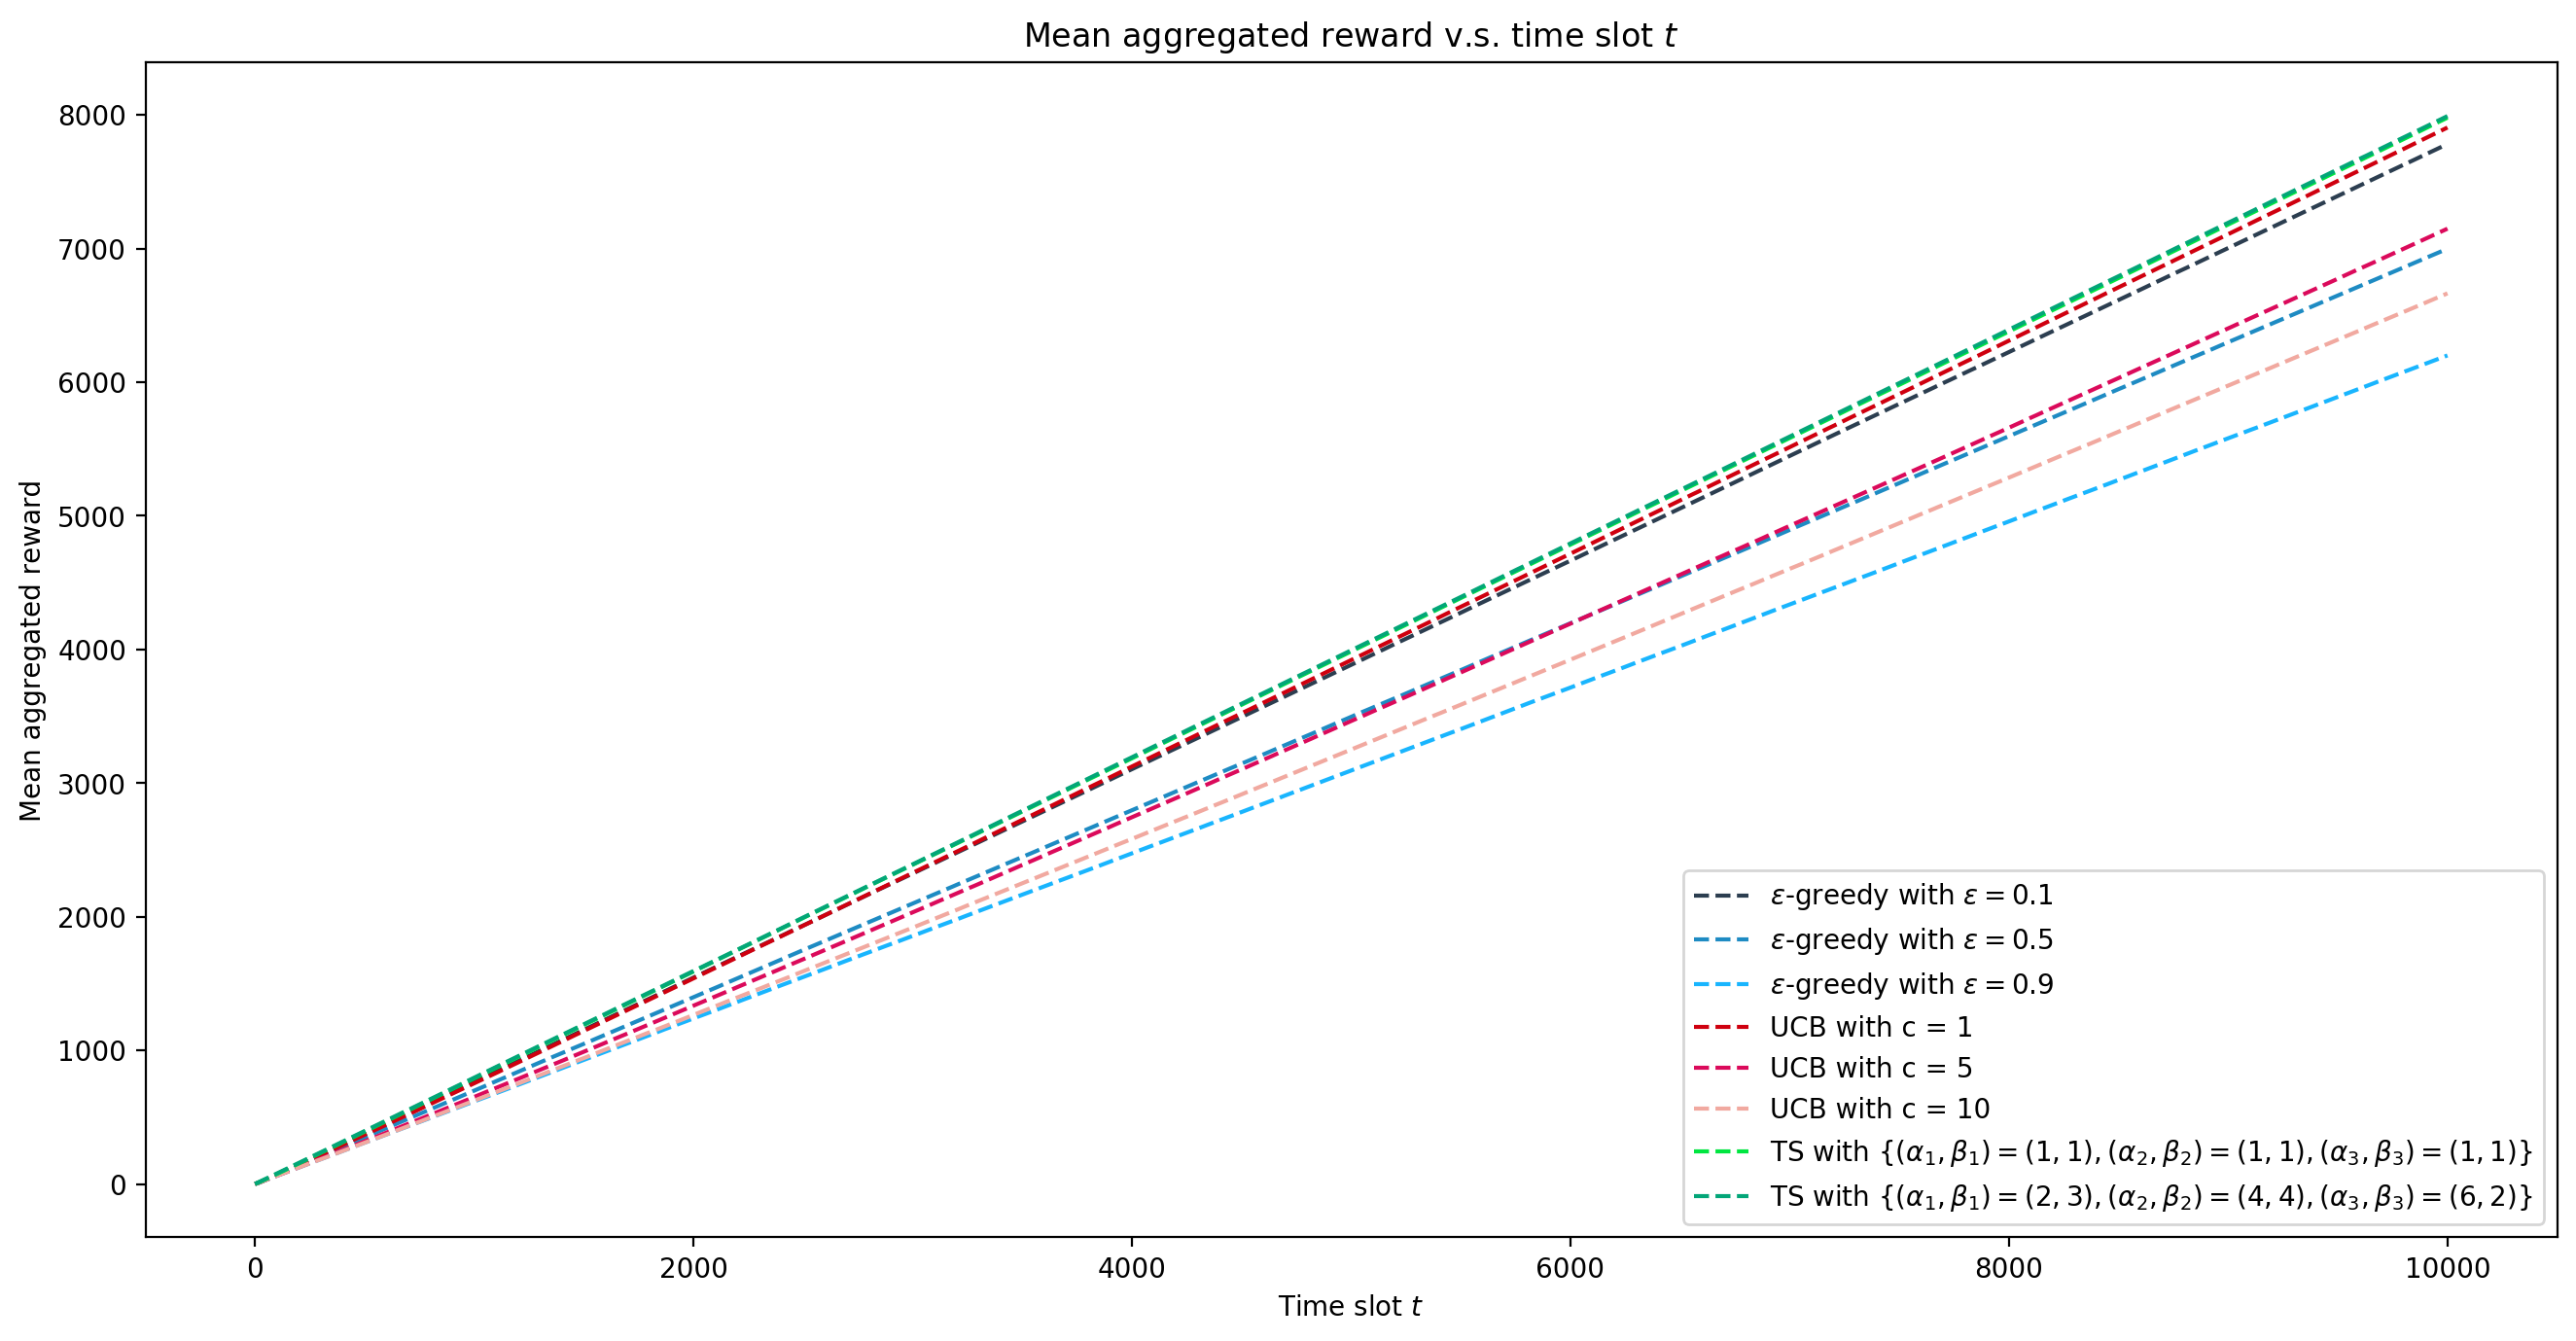

In [9]:
sim.plot_mean_aggregated_reward()

# Plot the mean average reward v.s. time slot `t`

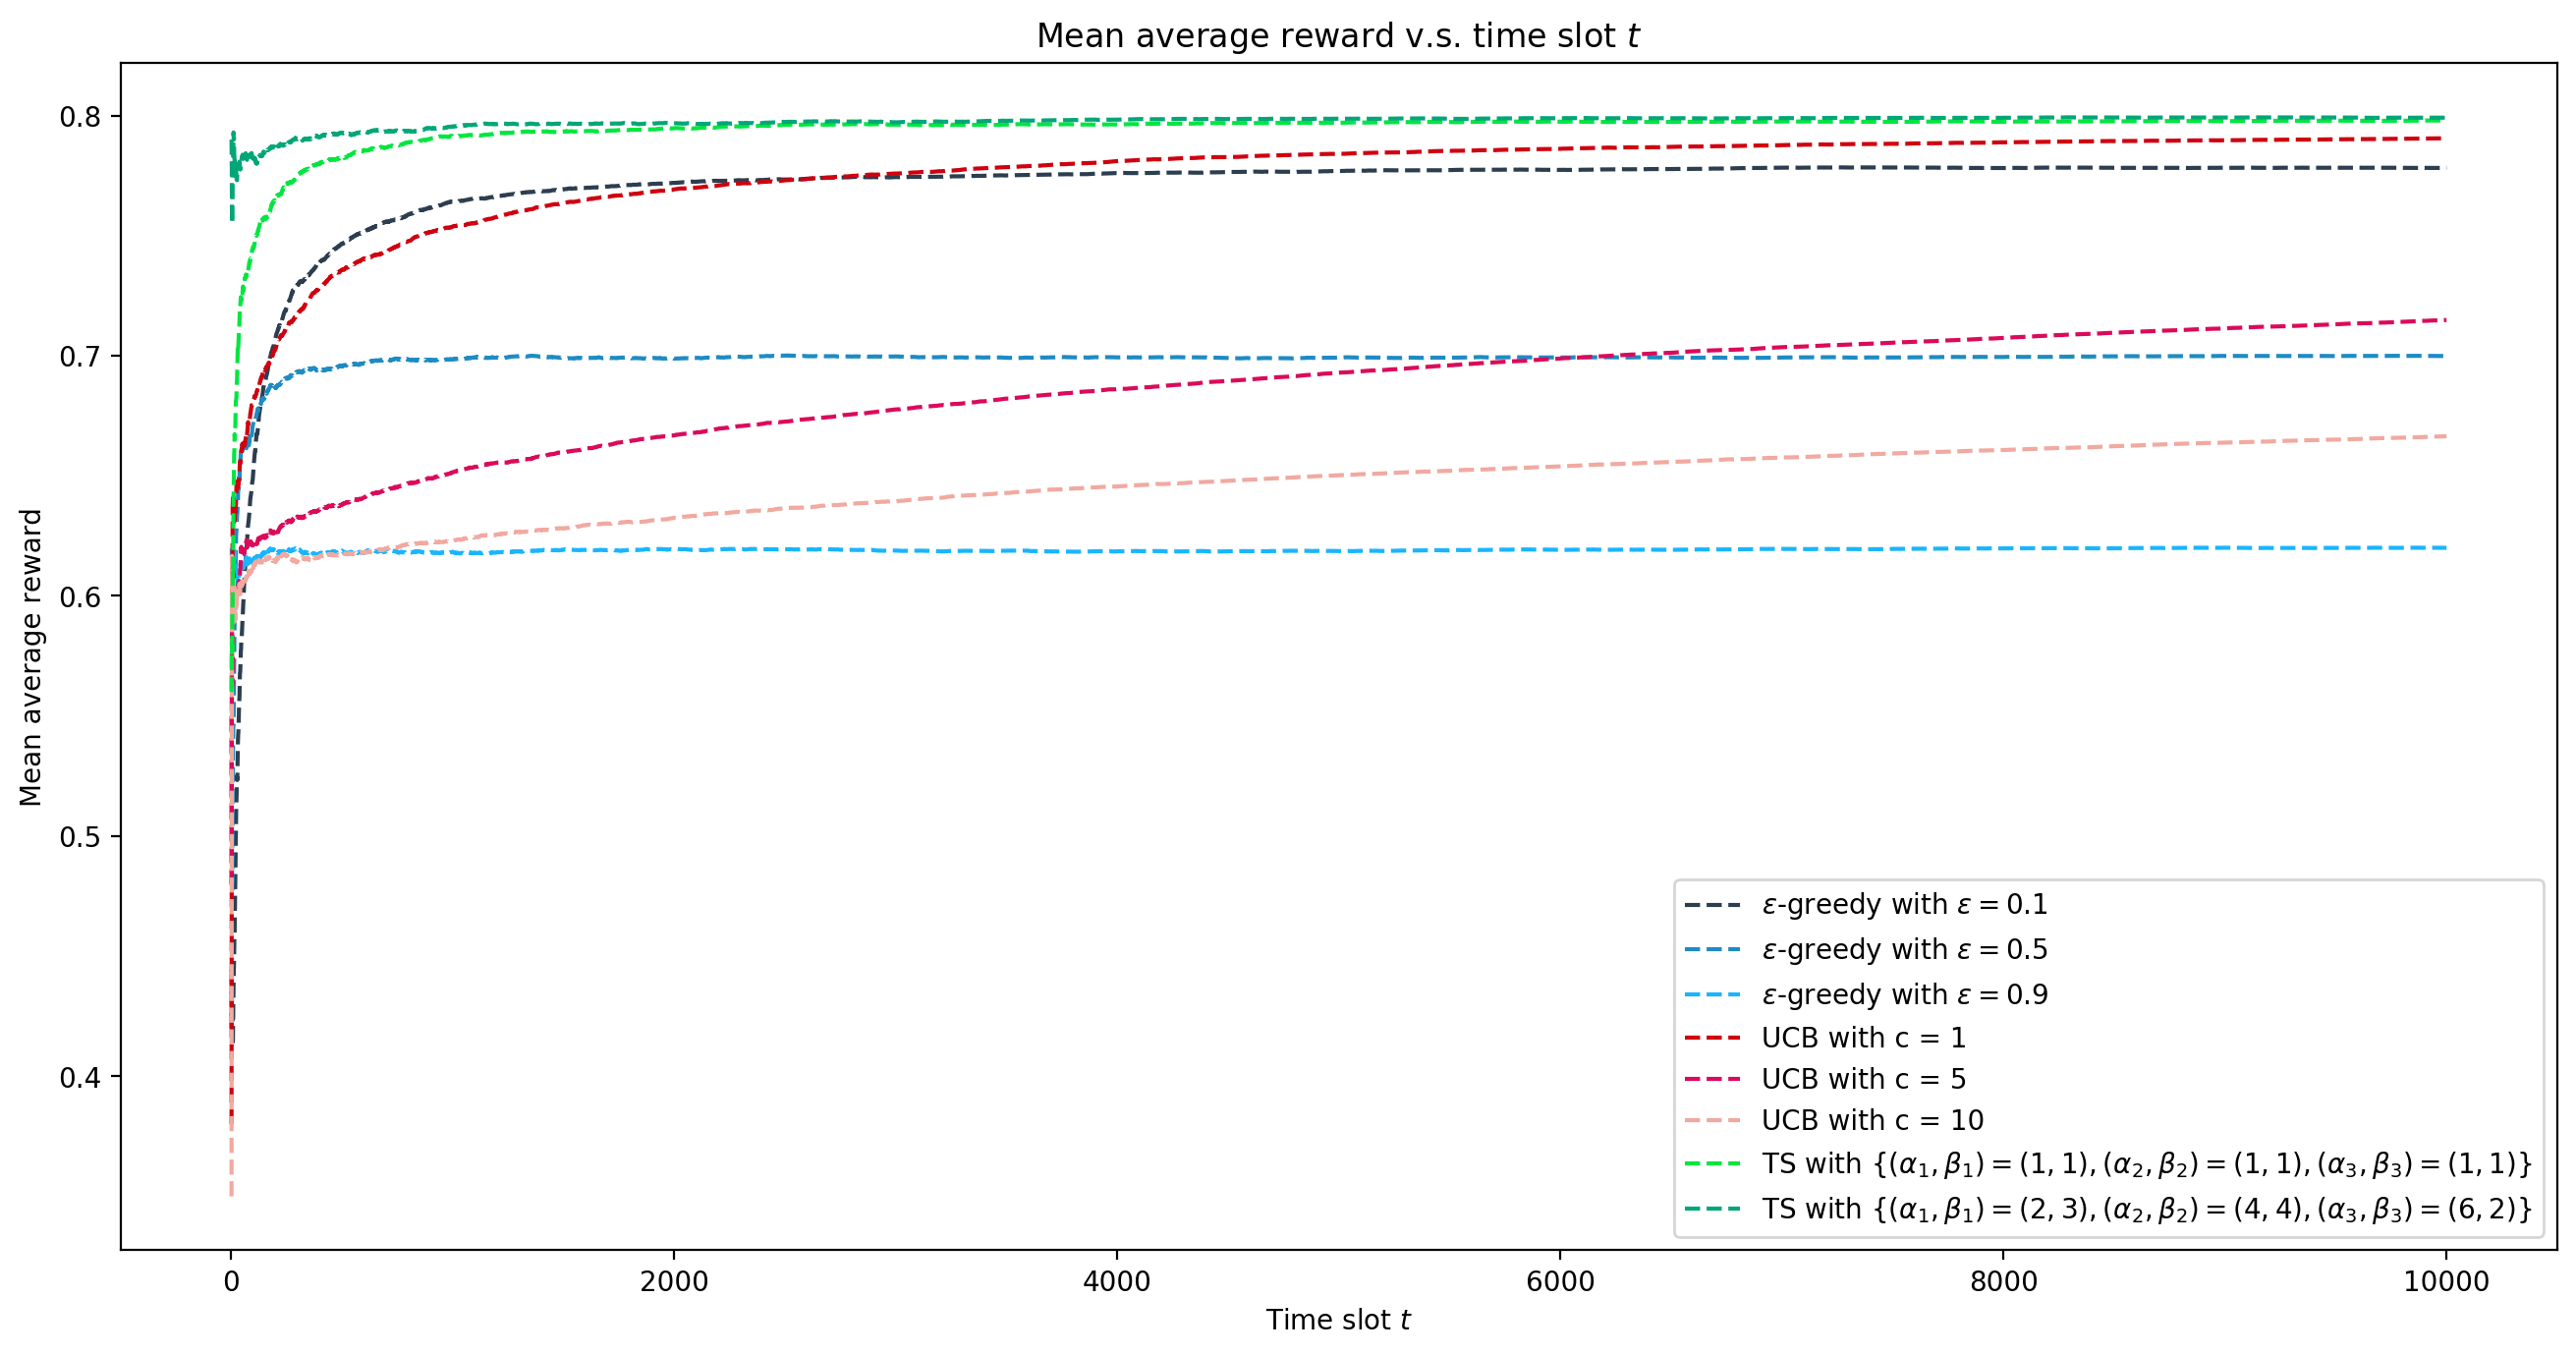

In [10]:
sim.plot_mean_average_reward()

# Plot the mean average reward v.s. time slot `t` in range [1, 300]

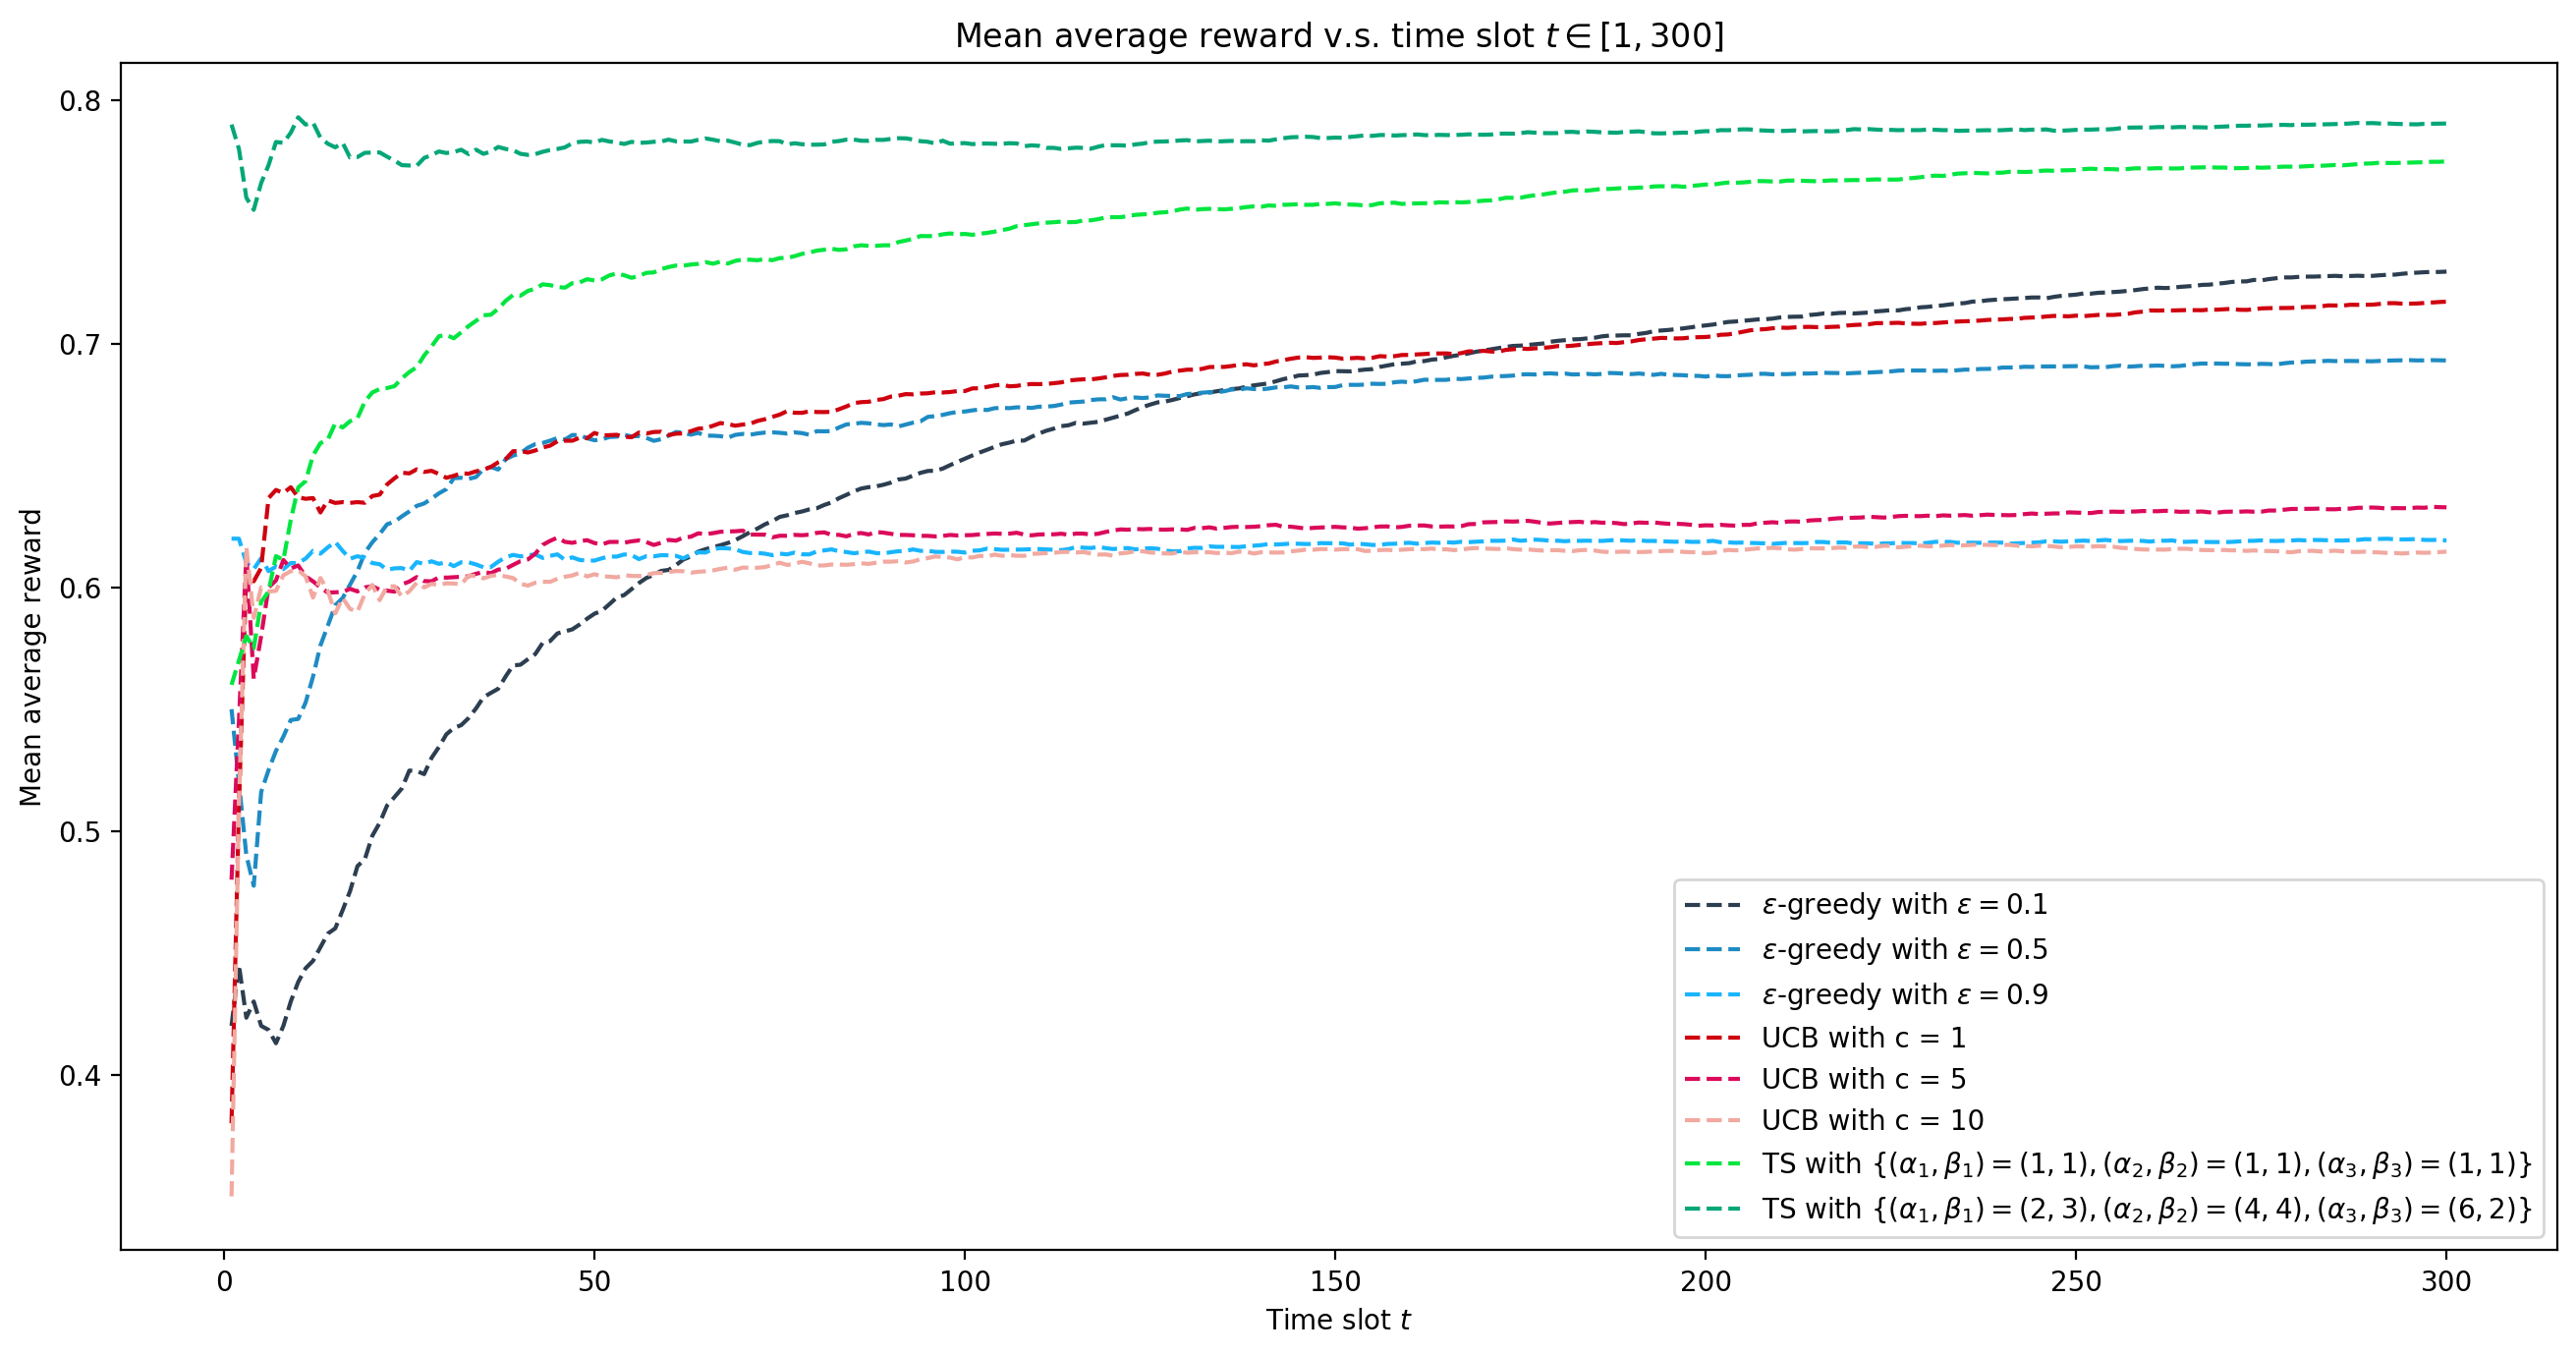

In [11]:
sim.plot_first_300_range_mean_average_reward()

# Plot the mean aggregated reward in total v.s. different agents

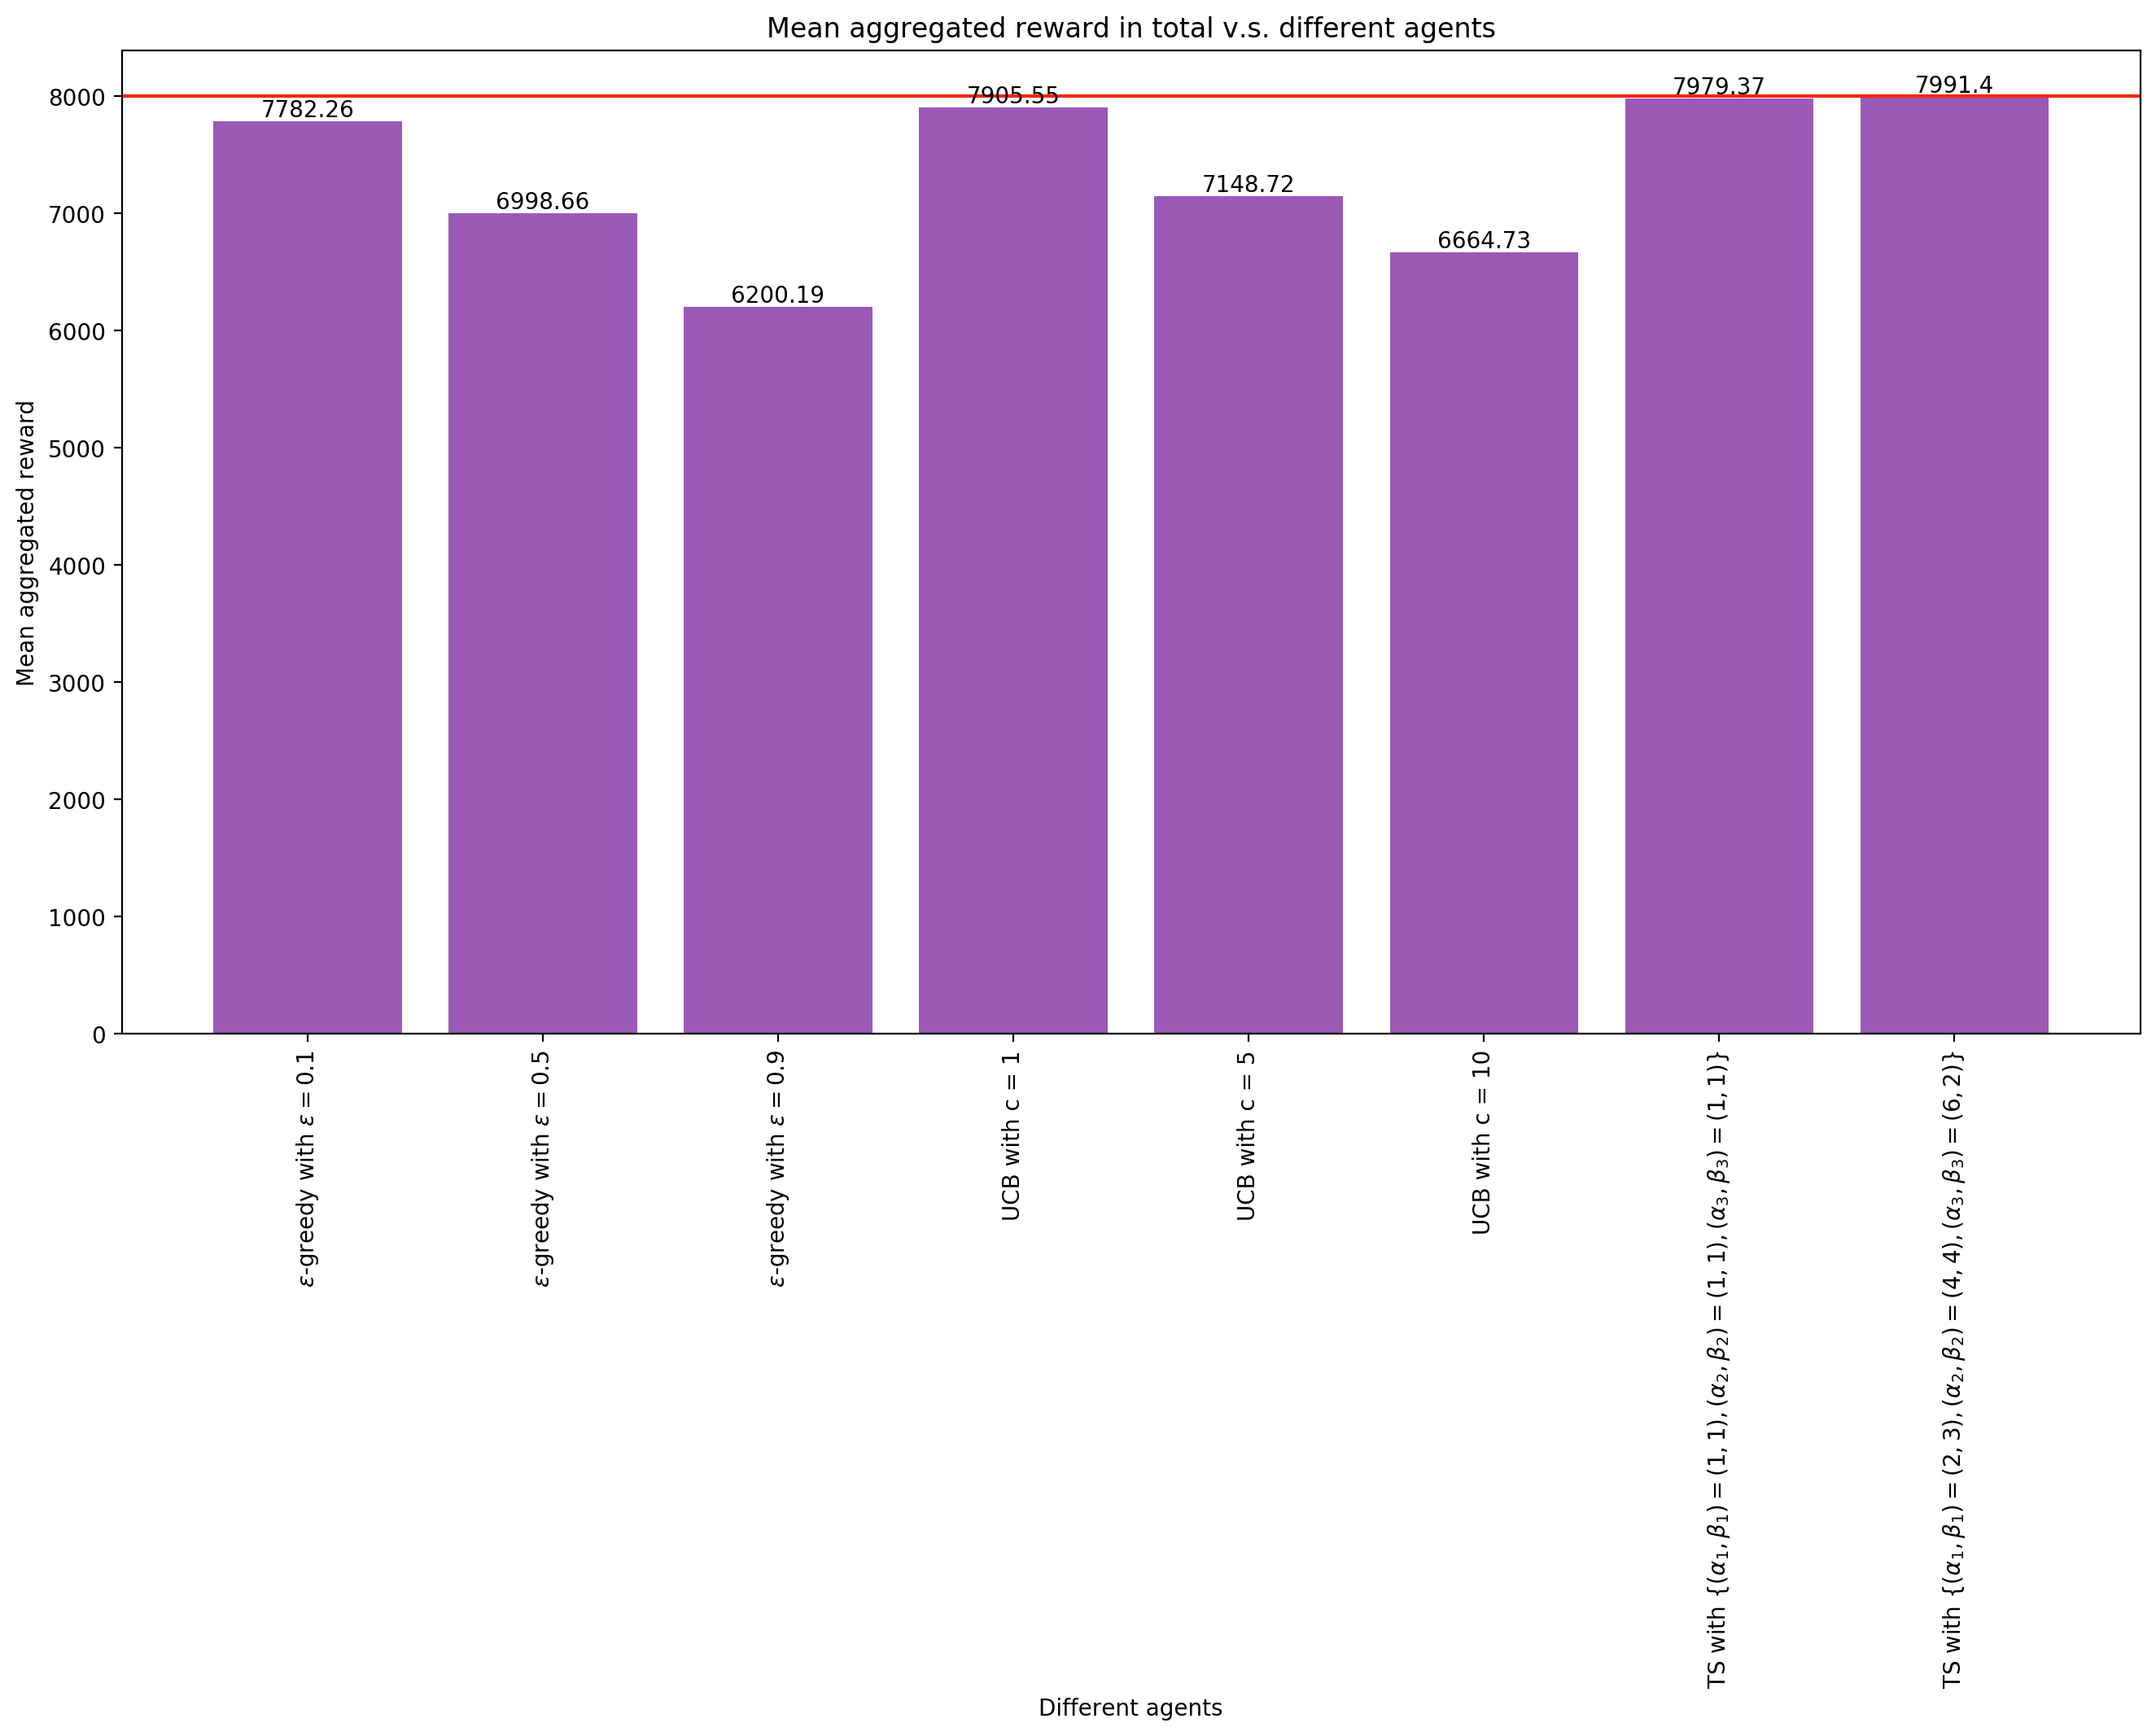

In [12]:
sim.plot_mean_aggregated_reward_in_total(oracle_value=oracle_value)

# Which one is best?

From the above plot of the aggregated reward in total, we can see that the TS algorithms achieve the aggregated reward which is closest to the oracle value. Thus, **TS(Thompson Sampling)** algorithm has the best performance.

# Plot the (posterior) probability of each arm

Text(0, 0.5, 'Mean posterior')

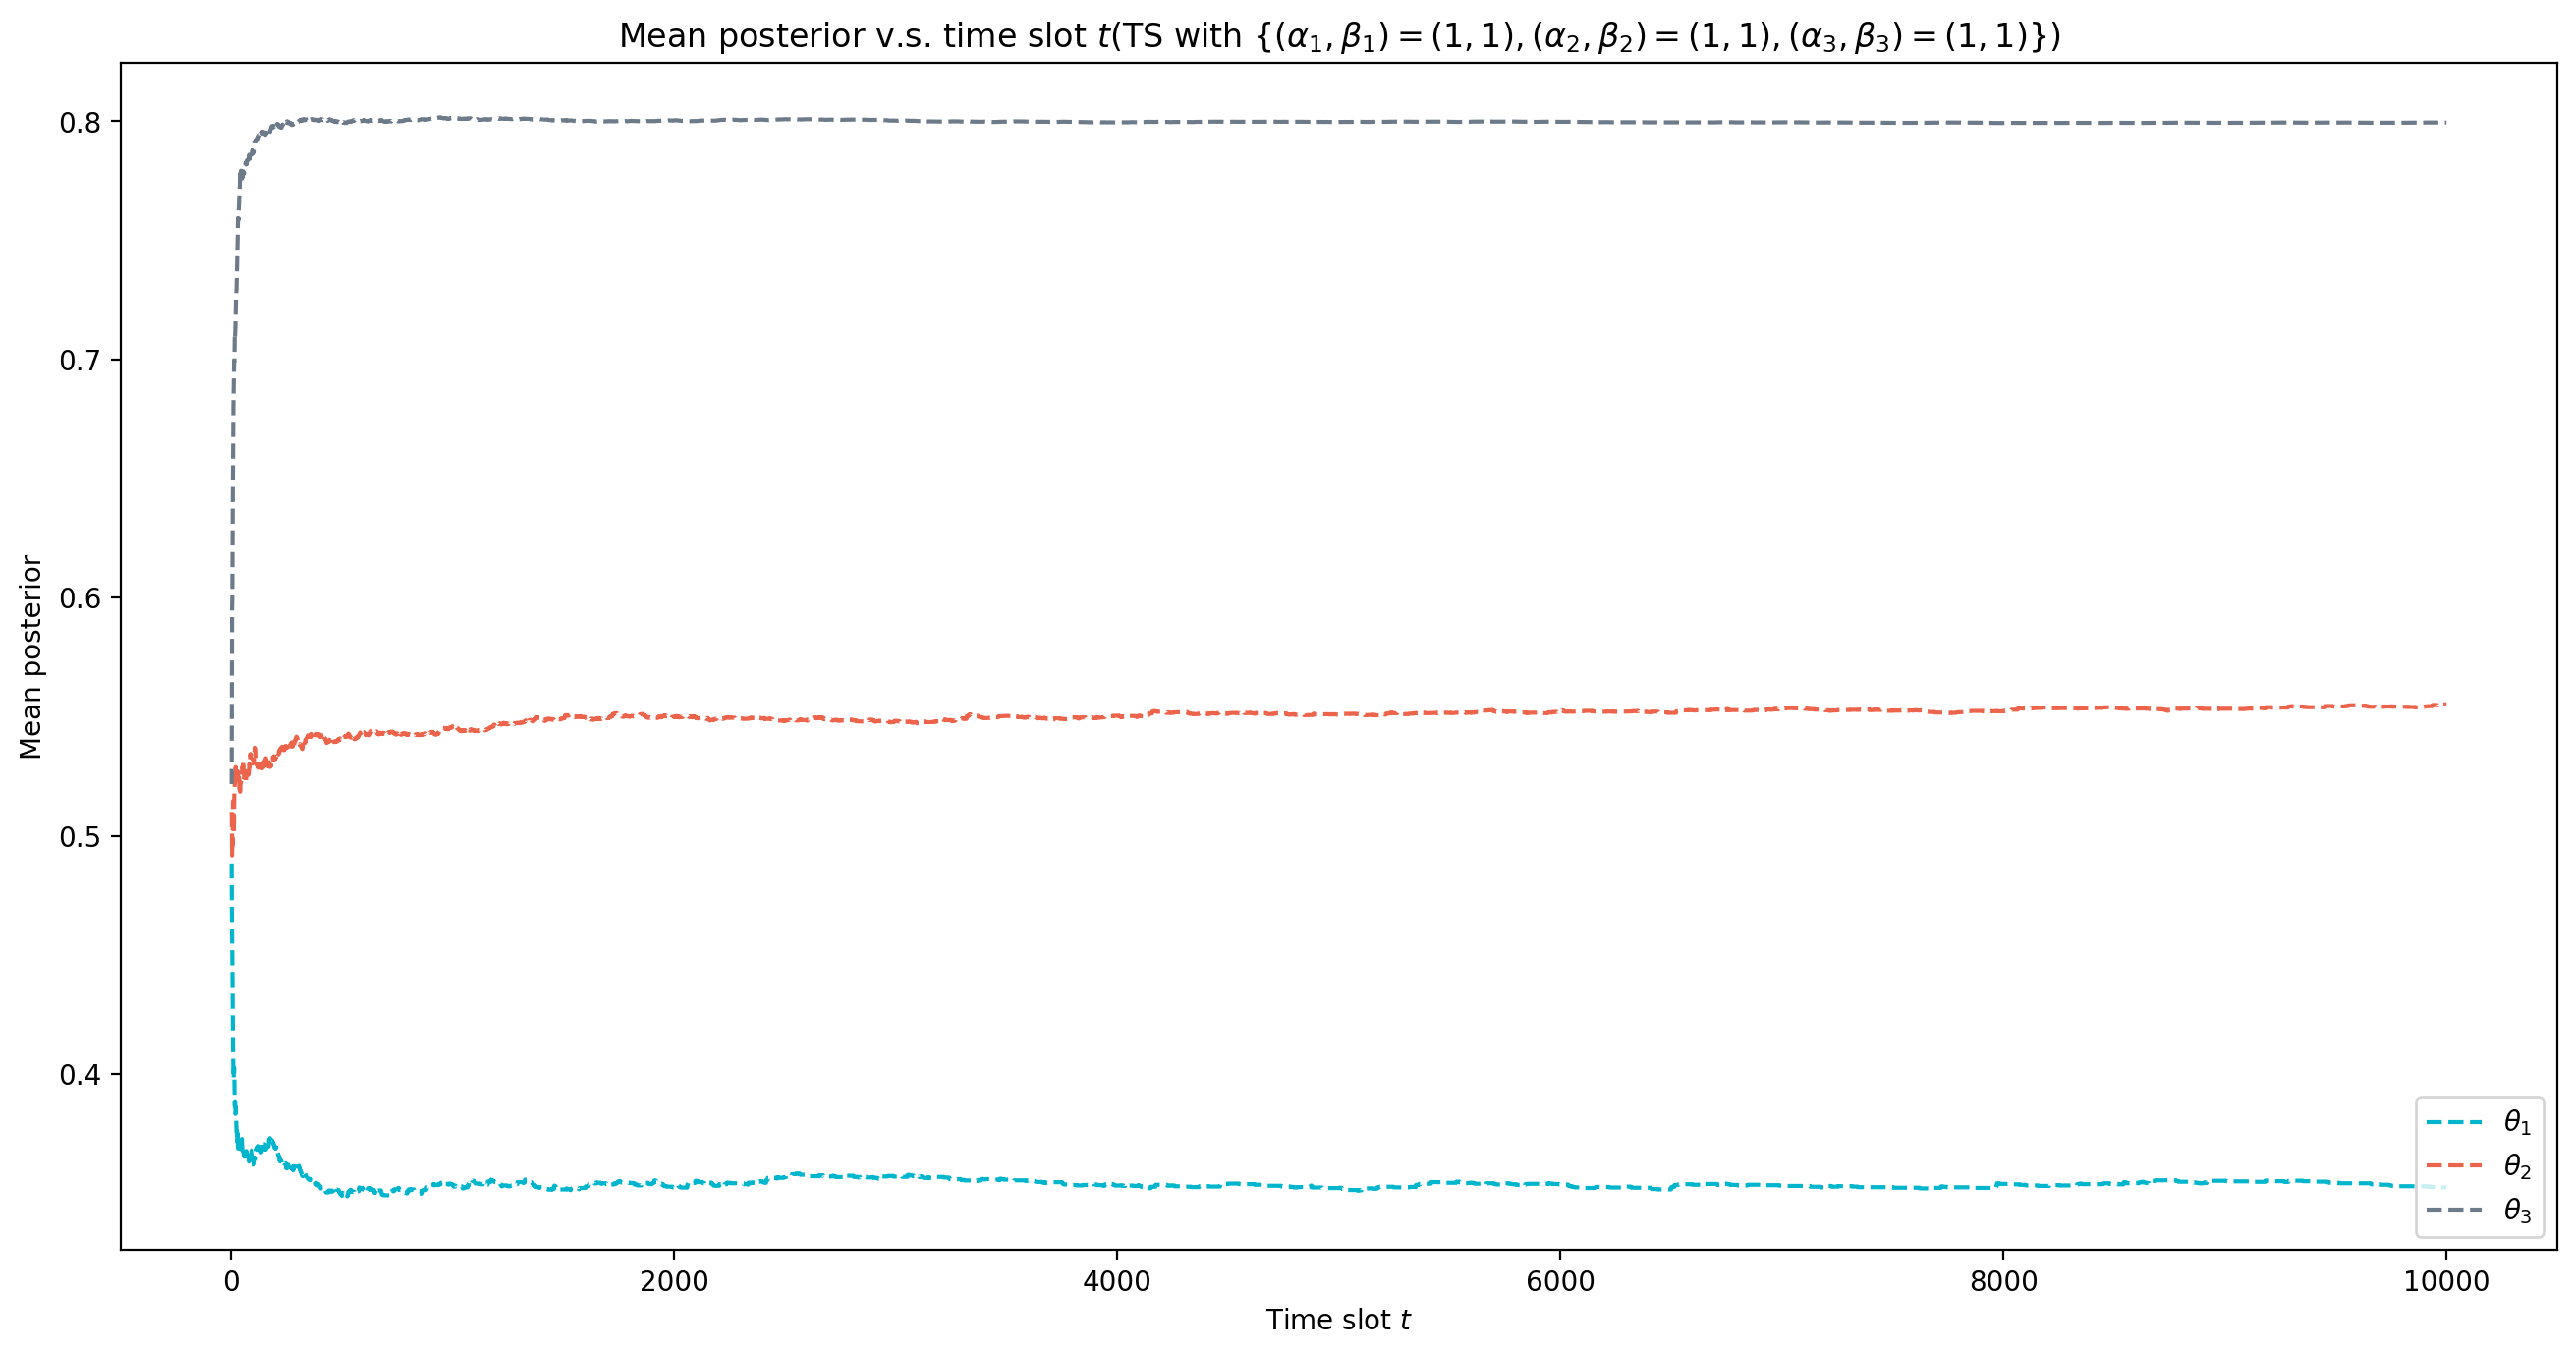

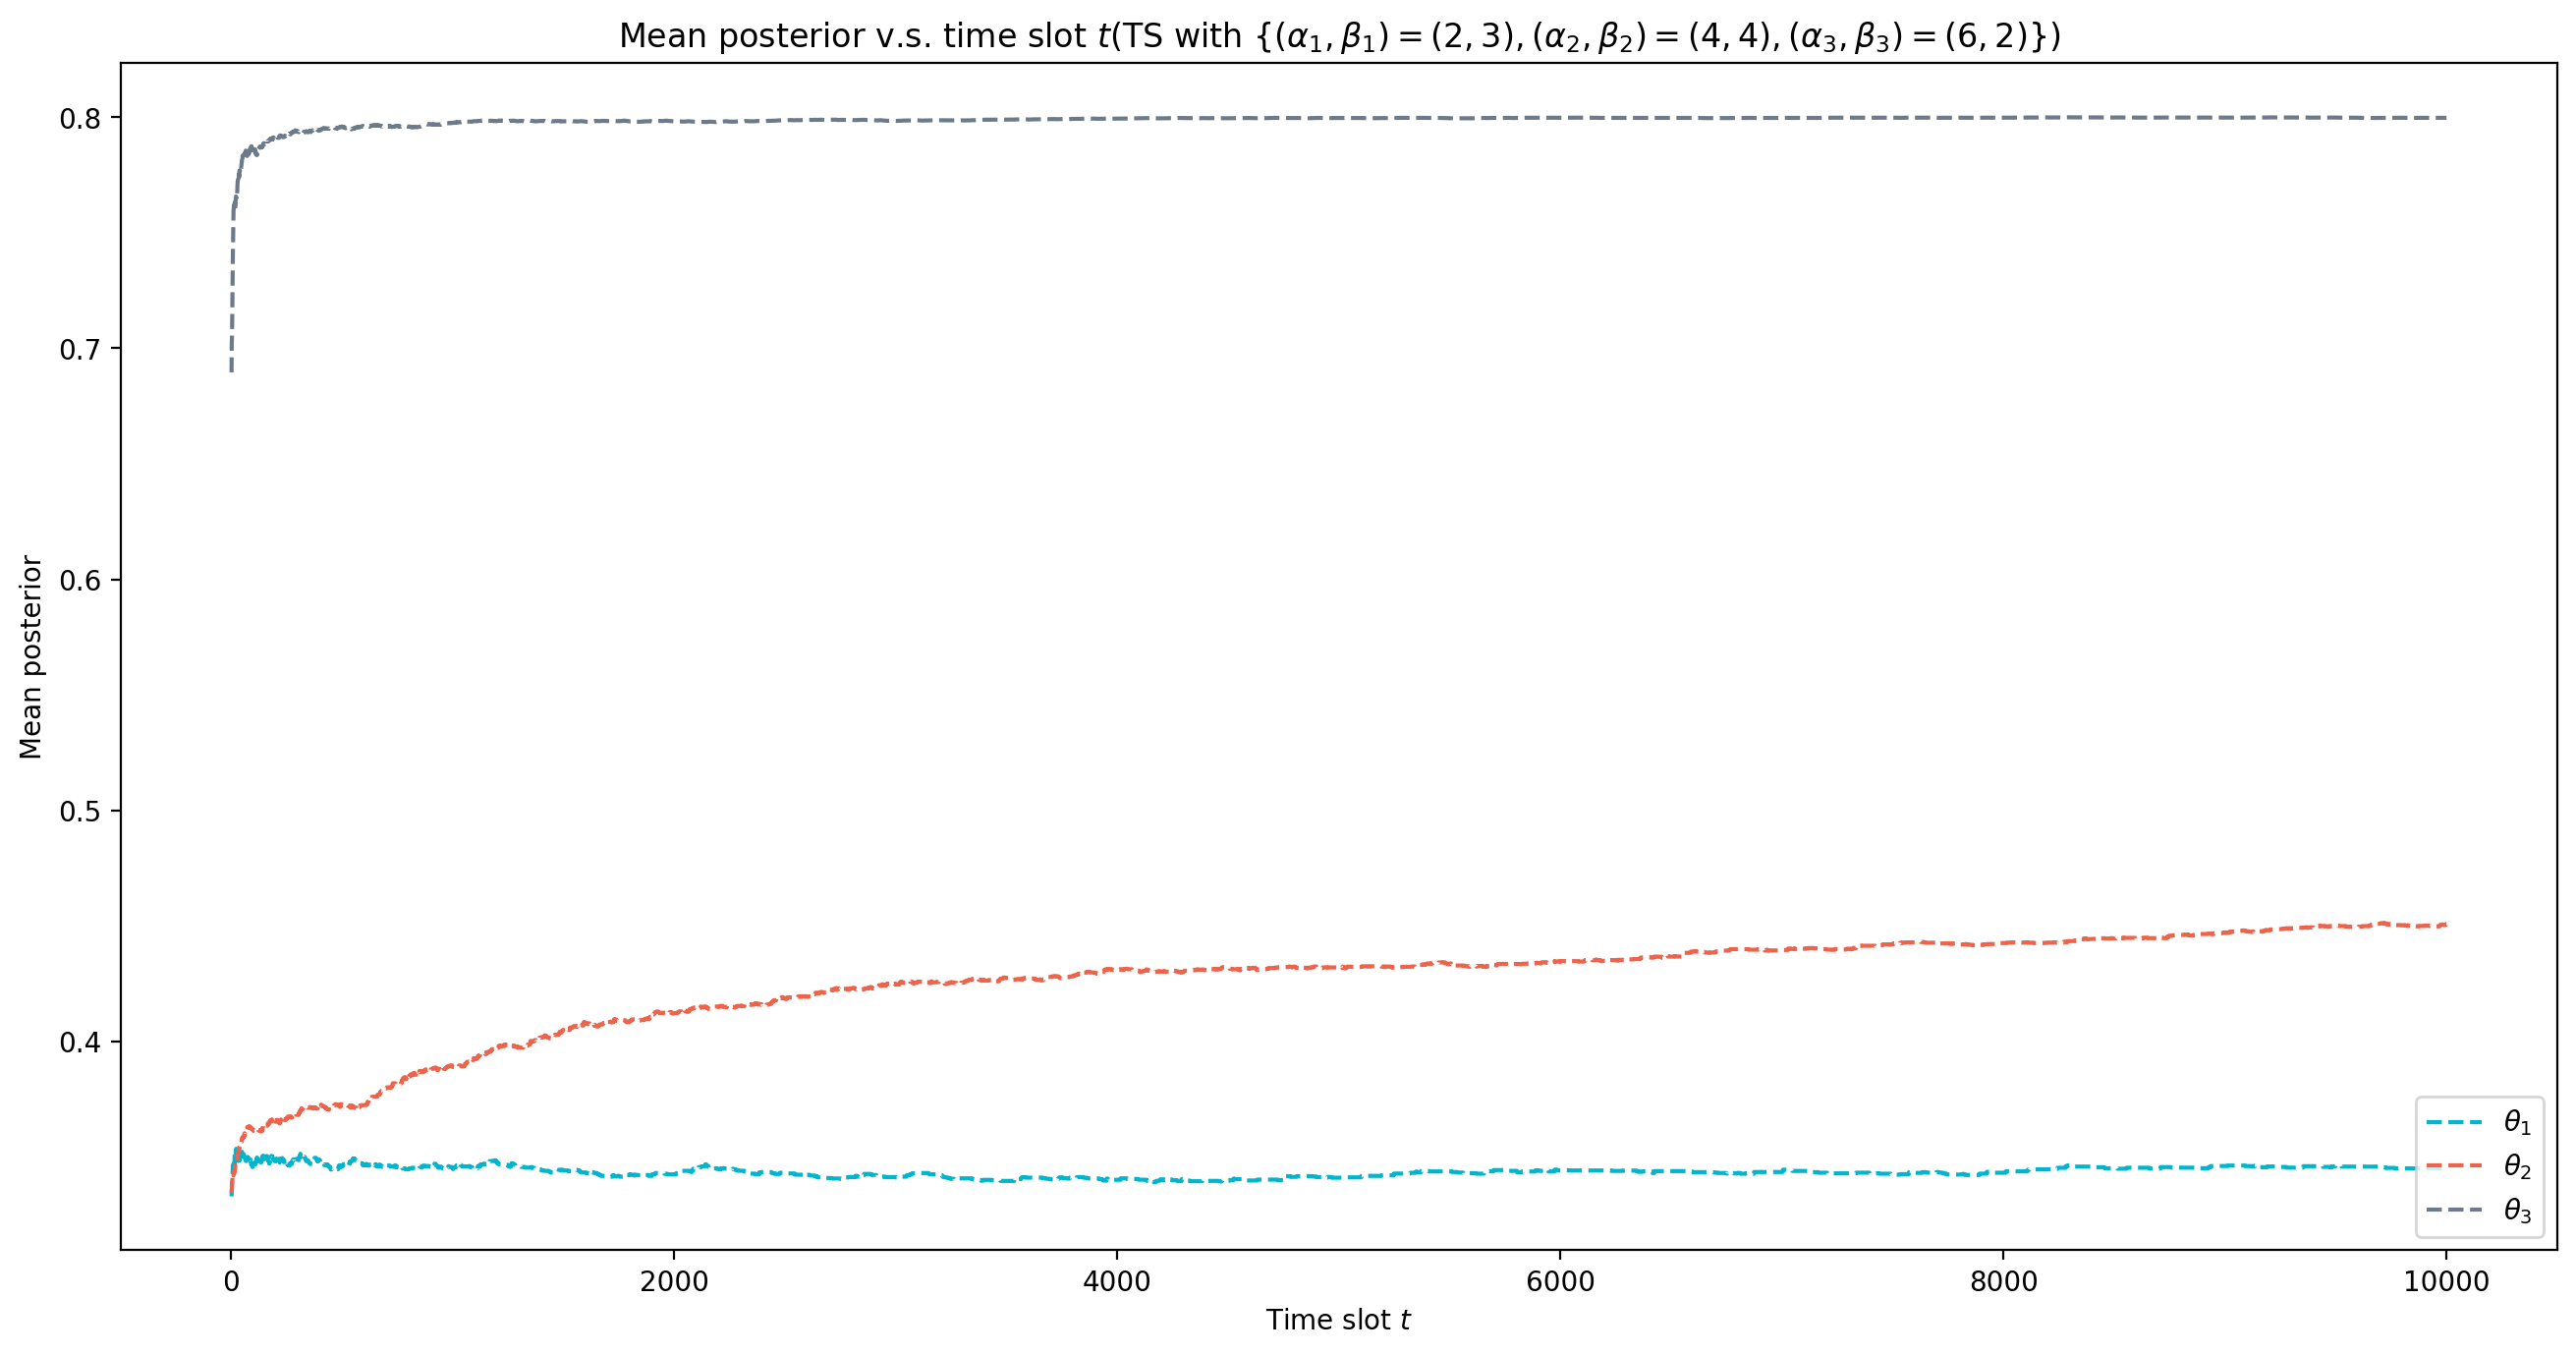

In [31]:
posterior0_3d_ndarray = np.zeros((100, N, 3), dtype=float)
posterior1_3d_ndarray = np.zeros((100, N, 3), dtype=float)
agent_name0 = sim.agent_name_array[-2]
agent_name1 = sim.agent_name_array[-1]

for row_index, row in enumerate(sim.payload_list[-2]):
    for col_index, payload in enumerate(row):
        alpha_list = payload[0]
        beta_list = payload[1]
        for i in range(3):
            posterior0_3d_ndarray[row_index][col_index][i] = alpha_list[i] / (alpha_list[i] + beta_list[i])
for row_index, row in enumerate(sim.payload_list[-1]):
    for col_index, payload in enumerate(row):
        alpha_list = payload[0]
        beta_list = payload[1]
        for i in range(3):
            posterior1_3d_ndarray[row_index][col_index][i] = alpha_list[i] / (alpha_list[i] + beta_list[i])

mean_posterior0_2d_ndarray = np.mean(posterior0_3d_ndarray, axis=0).T
mean_posterior1_2d_ndarray = np.mean(posterior1_3d_ndarray, axis=0).T

color_list = ['#00b5cc', '#ec644b', '#6c7a89']
label_list = ['$\\theta_{}$'.format(i) for i in range(1, 4)]

fig, ax = plt.subplots(figsize=(16,8), dpi=200)
for i in range(mean_posterior0_2d_ndarray.shape[0]):
    ax.plot(range(1, mean_posterior0_2d_ndarray.shape[1] + 1), mean_posterior0_2d_ndarray[i], '--', color=color_list[i], label=label_list[i])
ax.legend(loc='lower right')
ax.set_title('Mean posterior v.s. time slot $t$({})'.format(agent_name0))
ax.set_xlabel('Time slot $t$')
ax.set_ylabel('Mean posterior')

fig, ax = plt.subplots(figsize=(16,8), dpi=200)
for i in range(mean_posterior1_2d_ndarray.shape[0]):
    ax.plot(range(1, mean_posterior1_2d_ndarray.shape[1] + 1), mean_posterior1_2d_ndarray[i], '--', color=color_list[i], label=label_list[i])
ax.legend(loc='lower right')
ax.set_title('Mean posterior v.s. time slot $t$({})'.format(agent_name1))
ax.set_xlabel('Time slot $t$')
ax.set_ylabel('Mean posterior')

## Impact of $(\alpha, \beta)$ on estimation

As we can see from the plots, we found that no matter what are the values of the $\alpha_i$ and $\beta_i$, the estimation of $\theta_i$ always converges to constant values, for the same machine. The estimation of the largest $\theta$ is always very close to the true value.

# Understanding of the exploration-exploitation trade-off in bandit algorithms

In the context of bandit algorithms, the goal is to achieve the largest aggregated reward in a fixed amount time. Thus, there exists a trade-off: should we spend most of time exploring, or should we spend most of time exploiting? _Exploration_ means that we try some other arms in order to get samples rewards of the arms which we have less knowledege about. _Exploitation_ means that we stick to the arm with the largest probability to give us reward 1.

Most algorithms suggest that the more _greedy_ you are, the longer time you need to achieve the optimal goal.